In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df_wine = pd.read_csv("dataset_191_wine.csv")
df_wine.head()

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280%2FOD315_of_diluted_wines  Proline  
0             5.64  1.04                            3.92     1065  
1             4.38  1.05                            3.40     1050  
2             5.68  1.03                            3.17     1185  
3             7.80  0.86                            3.45     1480  
4             4.32  1.04                            2.93      735

In [25]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [59]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
             init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_std)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

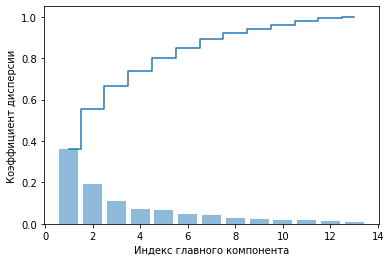

In [7]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Коэффициент дисперсии')
plt.xlabel('Индекс главного компонента')

plt.show()

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

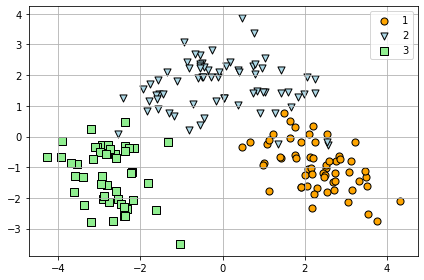

In [9]:
plt.scatter(X_pca[y == 1, 0],
            X_pca[y == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='1')
plt.scatter(X_pca[y == 2, 0],
            X_pca[y == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='2')
plt.scatter(X_pca[y == 3, 0],
            X_pca[y == 3, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='3')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

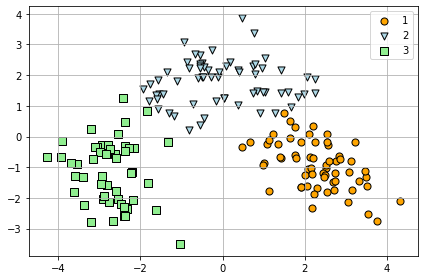

In [13]:
plt.scatter(X_pca[y_km == 1, 0],
            X_pca[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='1')
plt.scatter(X_pca[y_km == 0, 0],
            X_pca[y_km == 0, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='2')
plt.scatter(X_pca[y_km == 2, 0],
            X_pca[y_km == 2, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='3')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
class_mapping = {label: idx for idx, label in enumerate([2, 1, 3])}
y_cod = y.map(class_mapping).values

In [37]:
from sklearn.metrics import f1_score

f1_score(y_cod, y_km, average='weighted')

0.9660128746456331

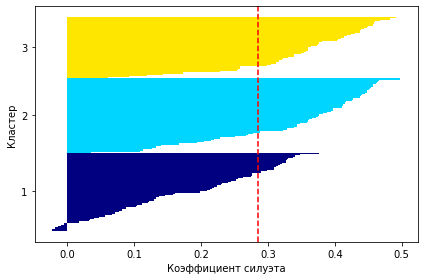

In [60]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')

plt.tight_layout()
plt.show()

In [62]:
np.mean(silhouette_samples(X_std, y_km, metric='euclidean'))

0.2848589191898987

In [63]:
y_k = []
silhouette_avg = []
f1 = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=3000,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X_std)
    y_k.append(y_km)
    silhouette_avg.append(np.mean(silhouette_samples(X_std, y_km, metric='euclidean')))
    f1.append(f1_score(y_cod, y_km, average='weighted'))

<function matplotlib.pyplot.show(close=None, block=None)>

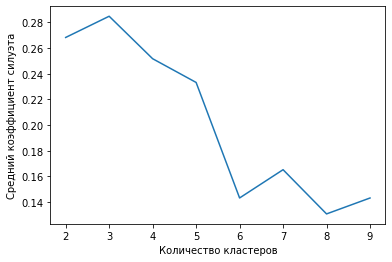

In [64]:
plt.plot(range(2, 10), silhouette_avg)
plt.ylabel('Средний коэффициент силуэта')
plt.xlabel("Количество кластеров")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

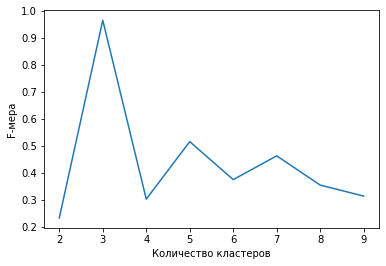

In [65]:
plt.plot(range(2, 10), f1)
plt.ylabel('F-мера')
plt.xlabel("Количество кластеров")
plt.show

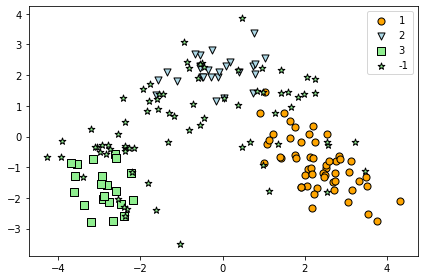

In [66]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.38, min_samples=13, metric='euclidean', n_jobs=-1).fit(X_std)
y_db = db.labels_
plt.scatter(X_pca[y_db == 0, 0],
            X_pca[y_db == 0, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='1')
plt.scatter(X_pca[y_db == 1, 0],
            X_pca[y_db == 1, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='2')
plt.scatter(X_pca[y_db == 2, 0],
            X_pca[y_db == 2, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='3')
plt.scatter(X_pca[y_db == -1, 0],
            X_pca[y_db == -1, 1],
            s=50, c='lightgreen',
            marker='*', edgecolor='black',
            label='-1')
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
f1_score(y-1, y_db, average='weighted')

0.683034449046085

In [44]:
color = cm.jet(3)
color

(0.0, 0.0, 0.553475935828877, 1.0)

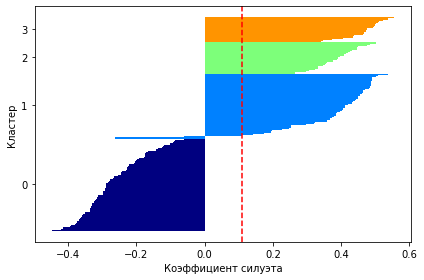

In [69]:
cluster_labels = np.unique(y_db)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_std, y_db, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_db == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')

plt.tight_layout()
plt.show()

In [70]:
np.mean(silhouette_samples(X_std, y_db, metric='euclidean'))

0.10895969431619153

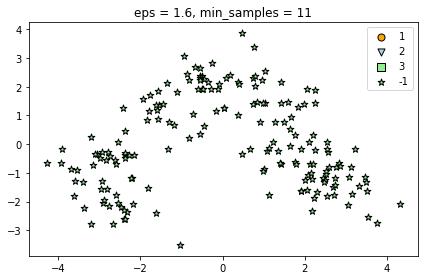

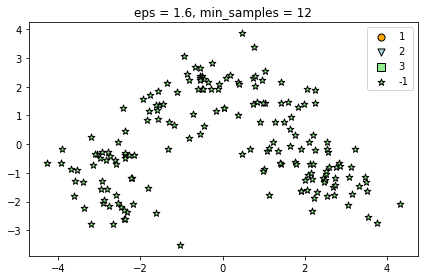

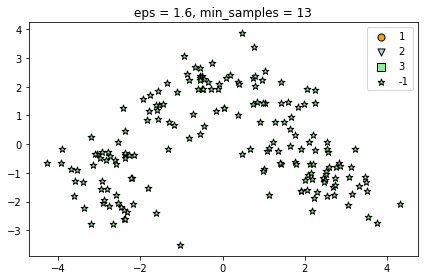

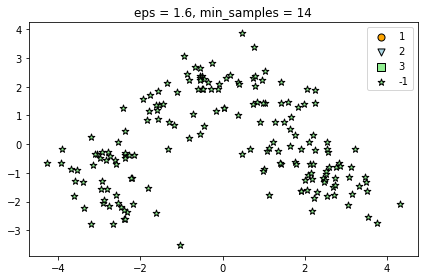

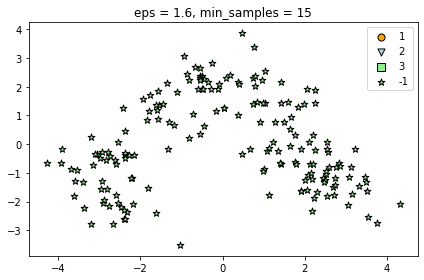

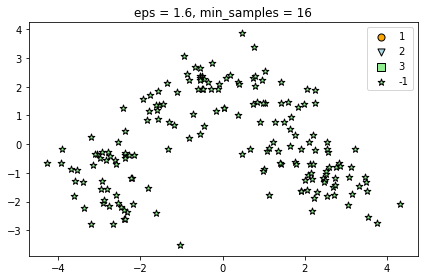

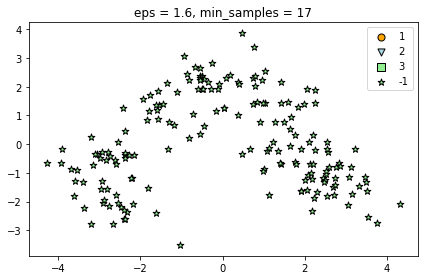

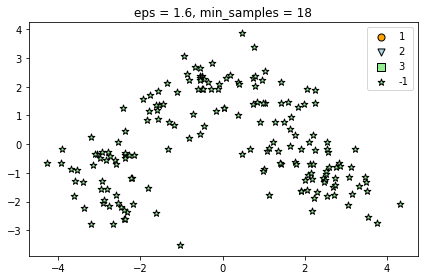

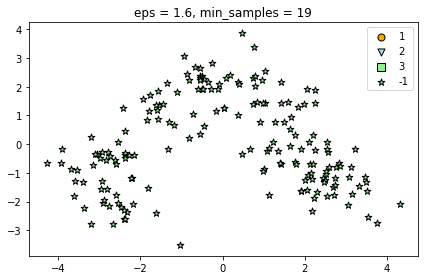

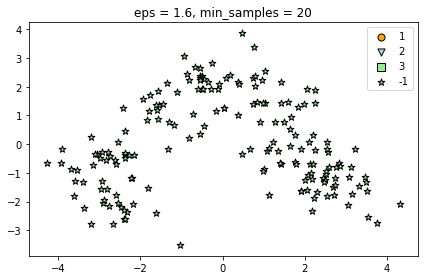

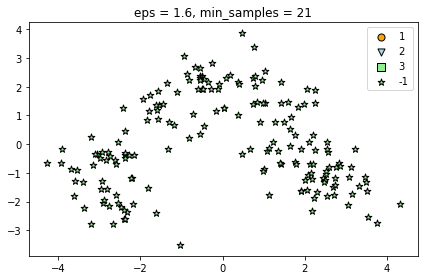

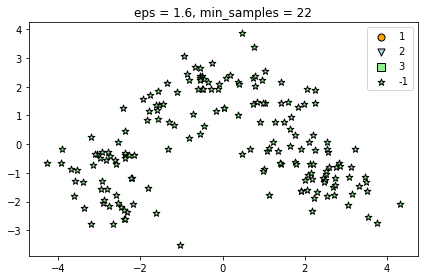

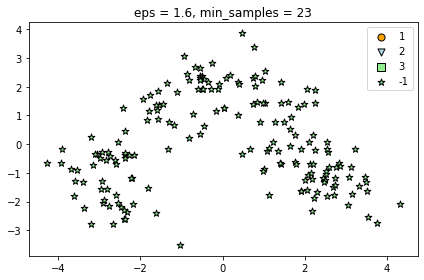

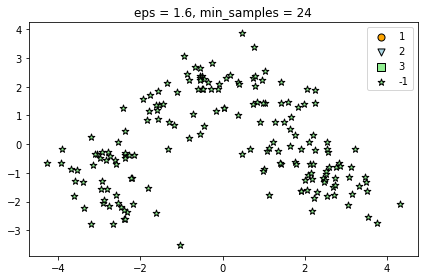

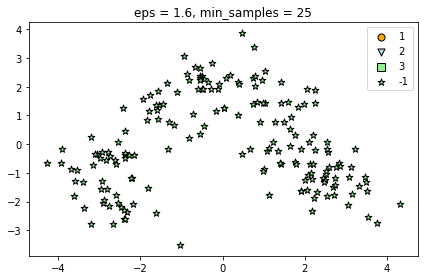

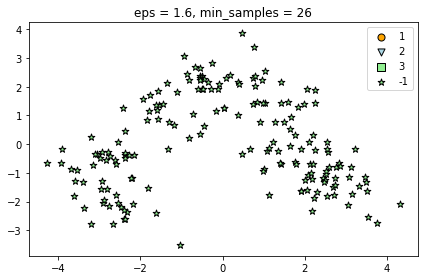

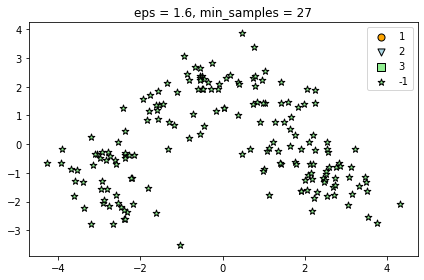

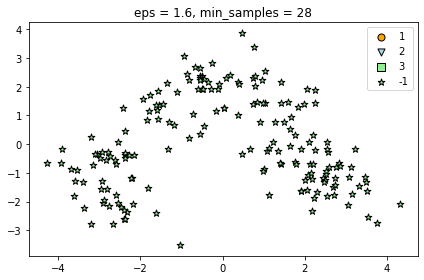

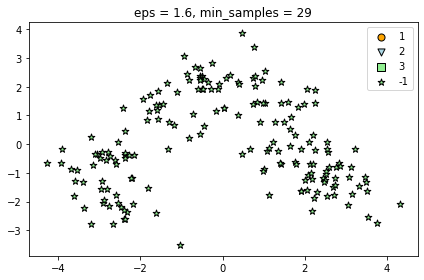

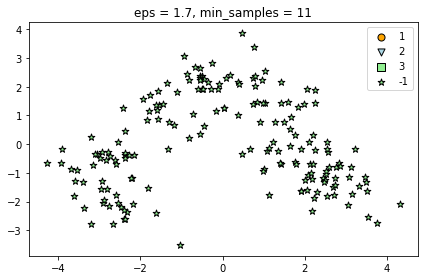

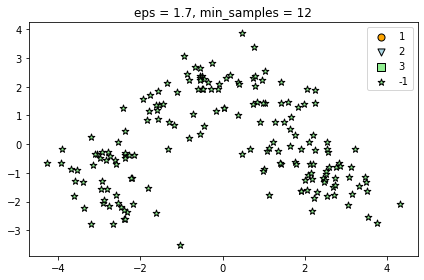

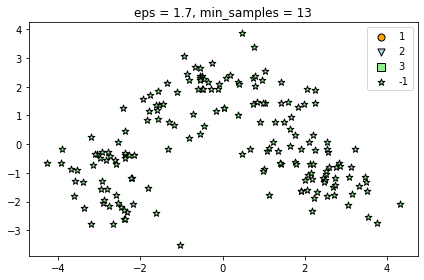

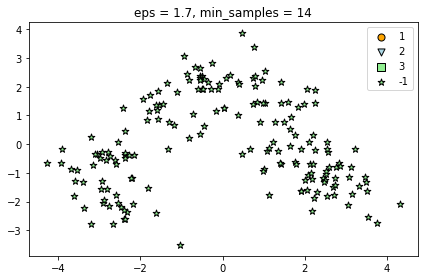

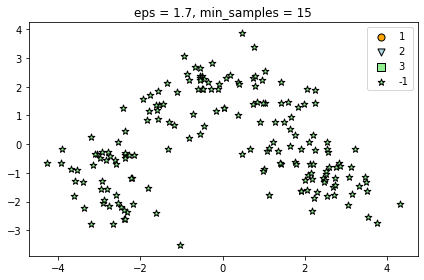

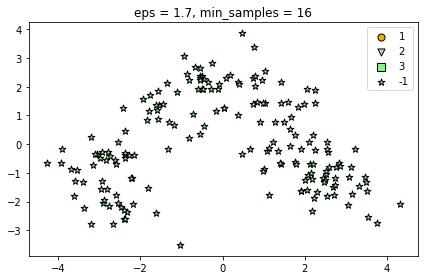

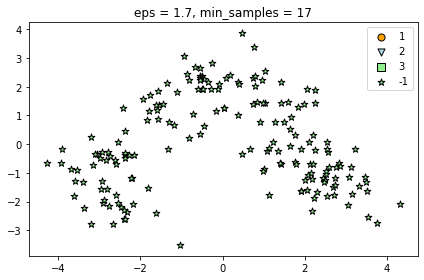

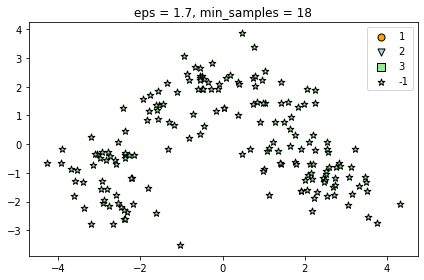

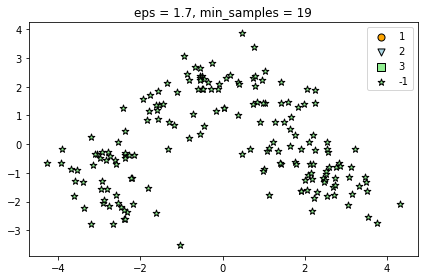

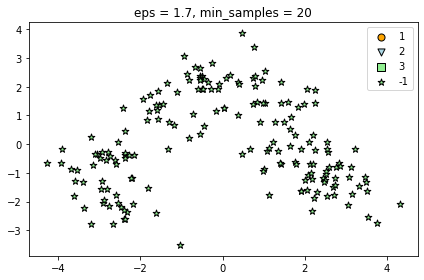

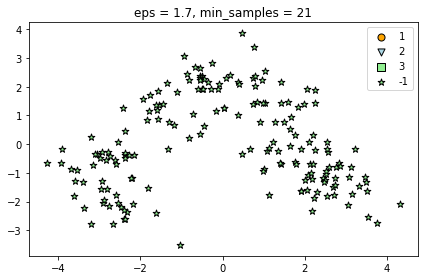

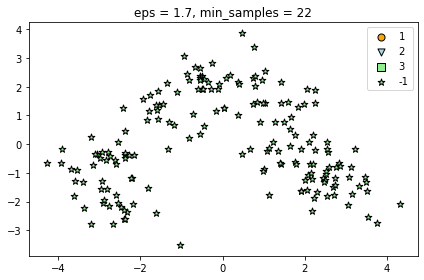

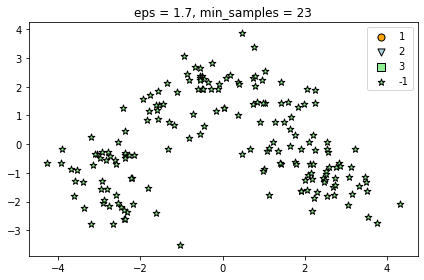

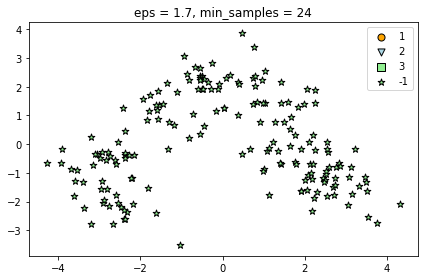

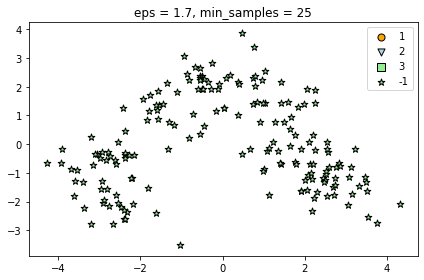

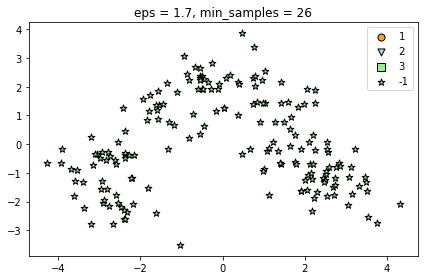

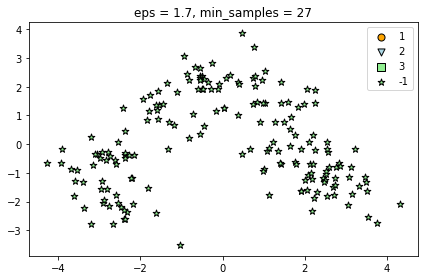

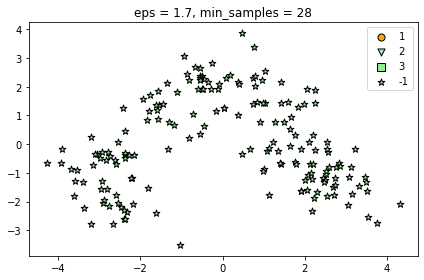

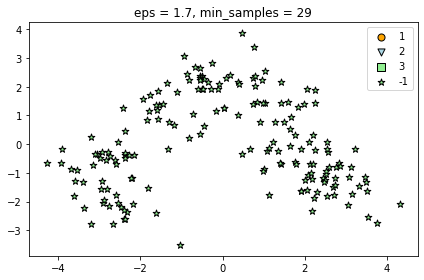

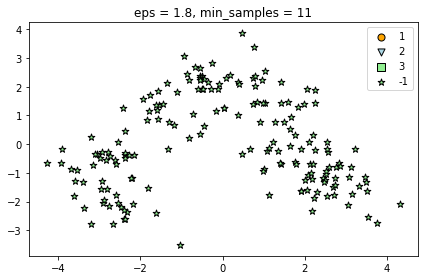

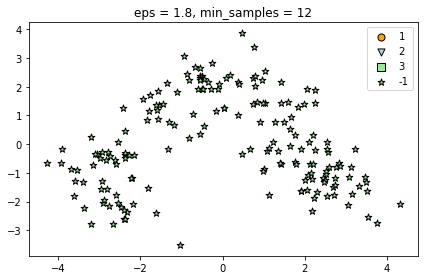

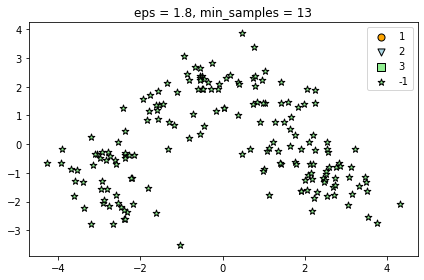

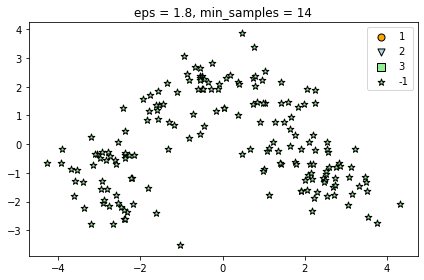

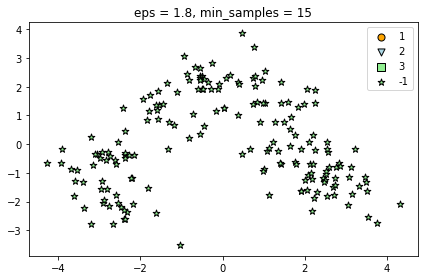

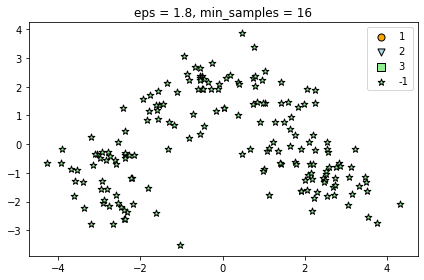

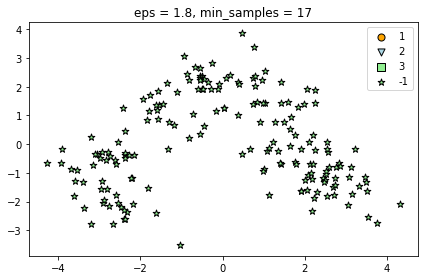

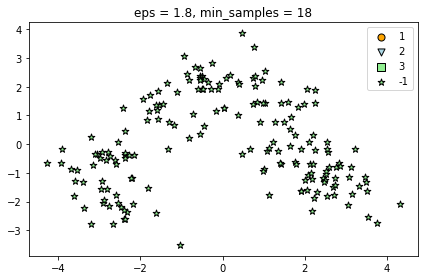

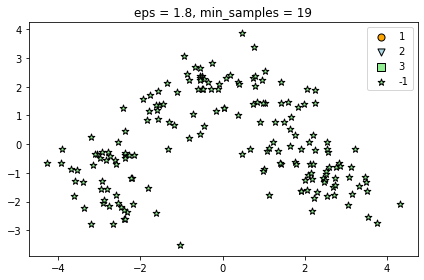

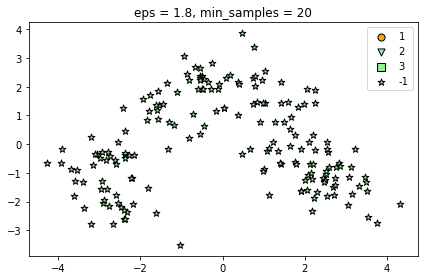

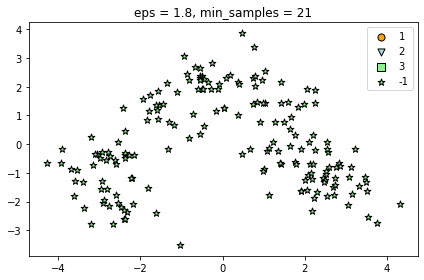

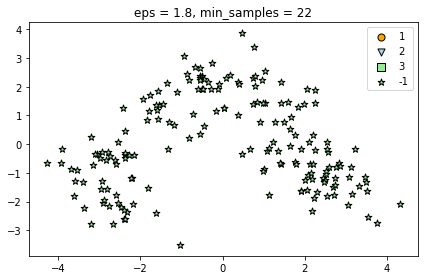

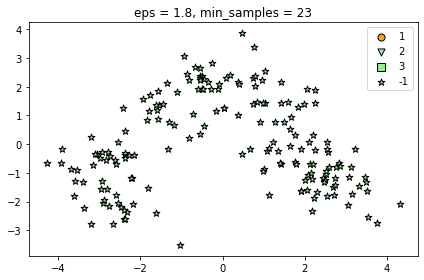

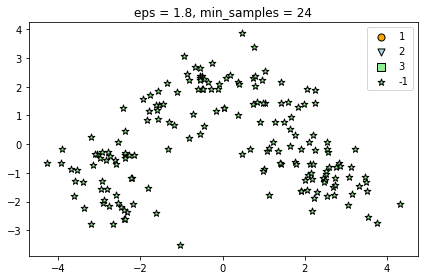

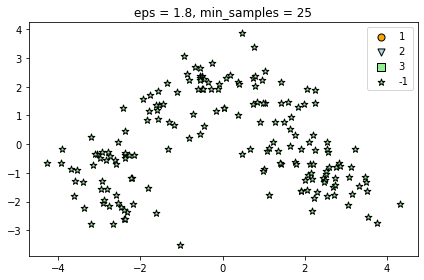

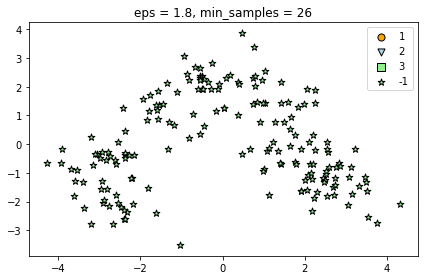

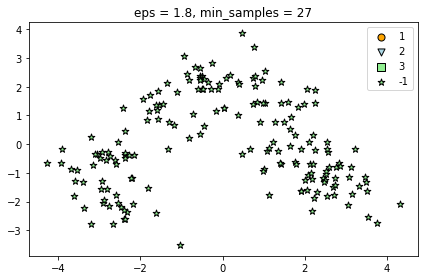

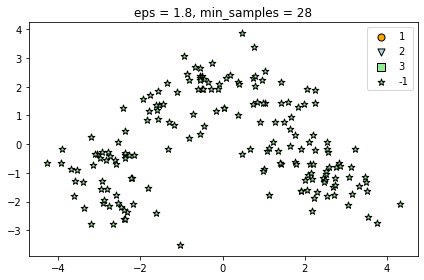

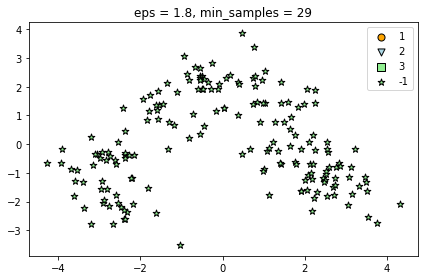

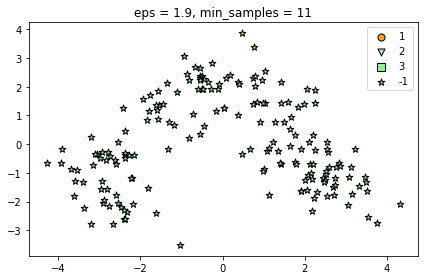

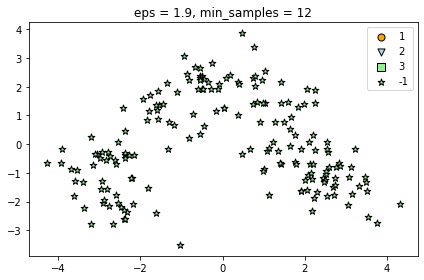

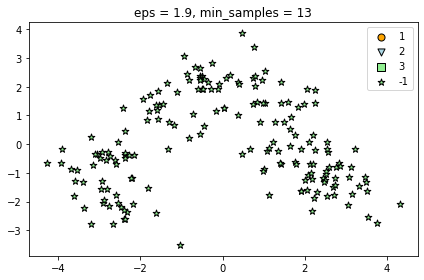

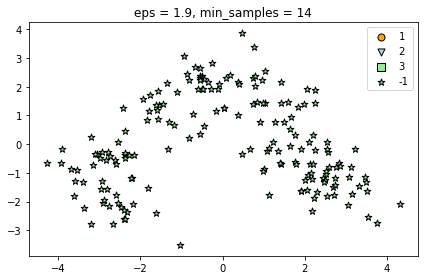

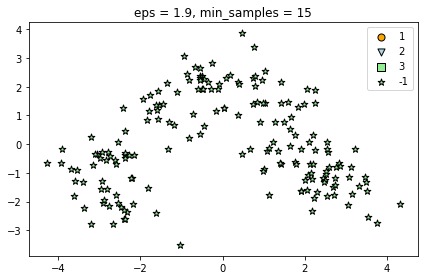

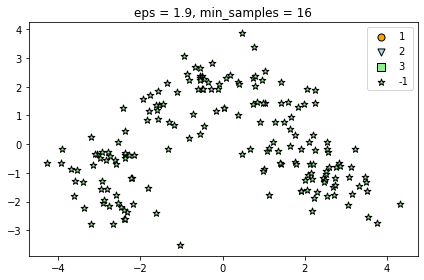

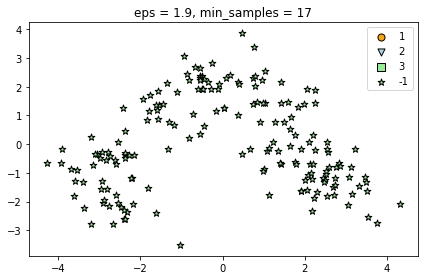

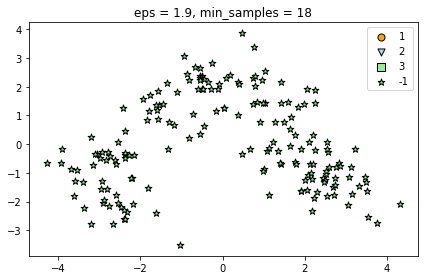

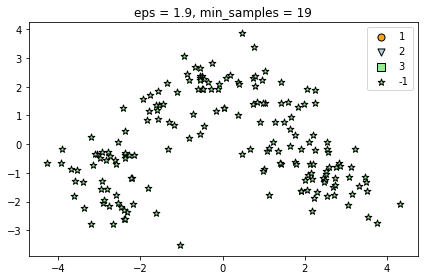

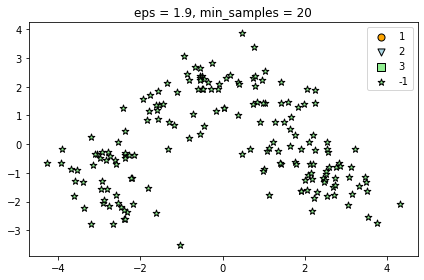

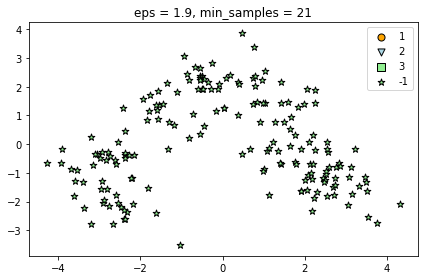

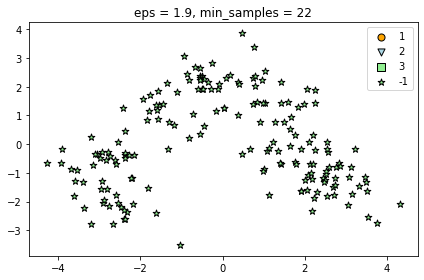

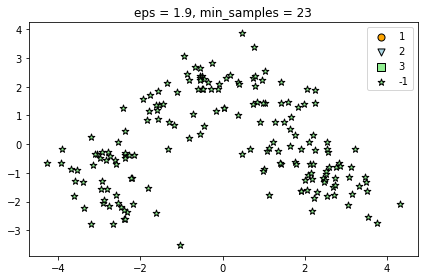

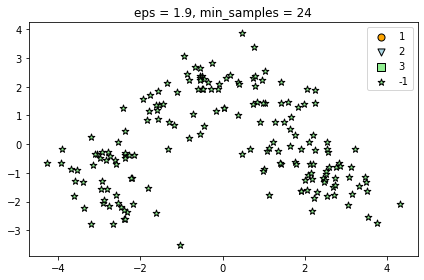

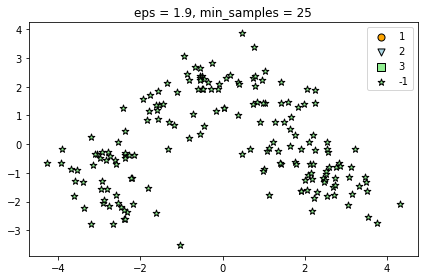

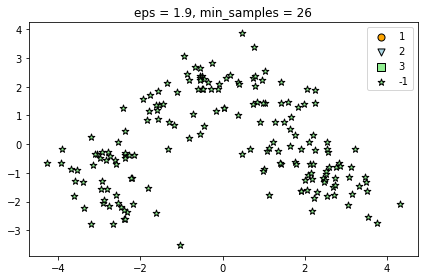

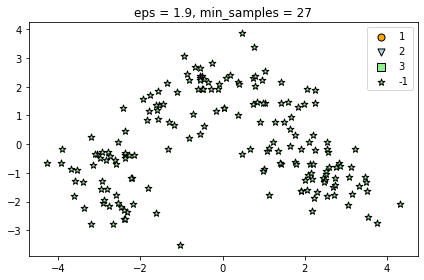

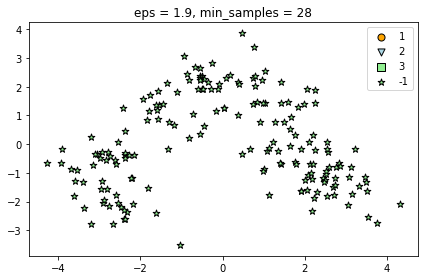

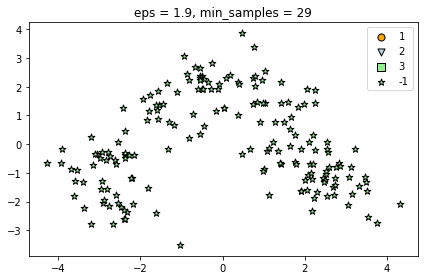

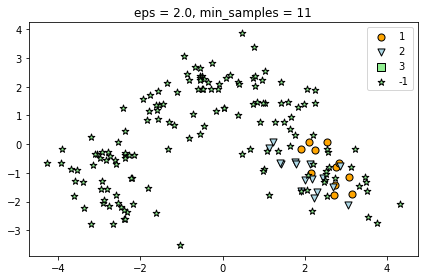

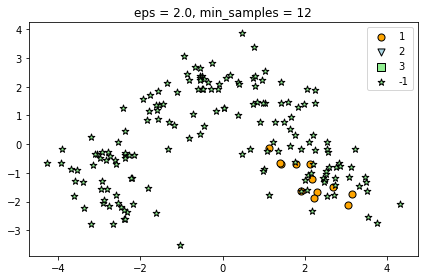

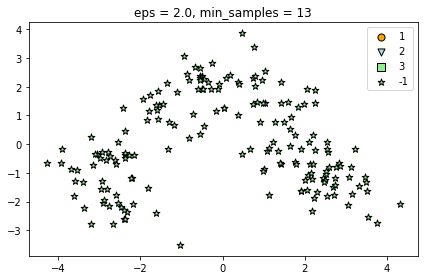

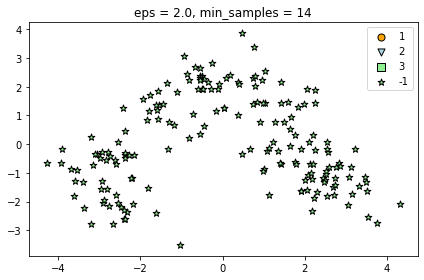

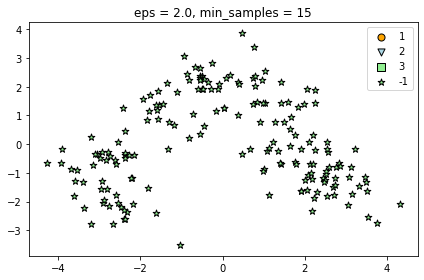

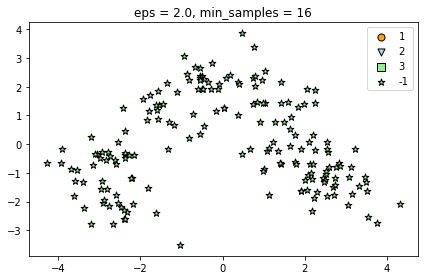

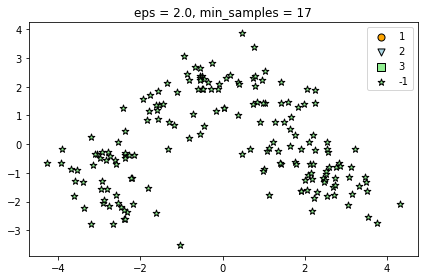

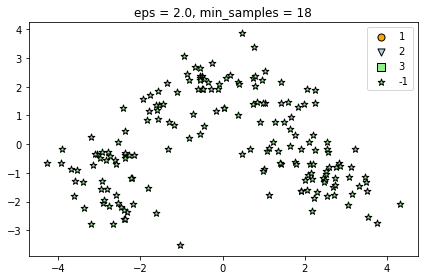

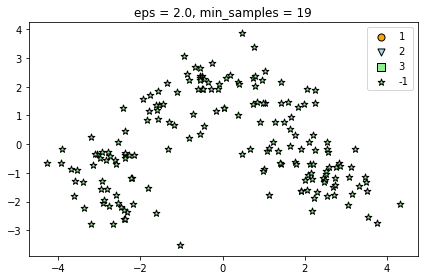

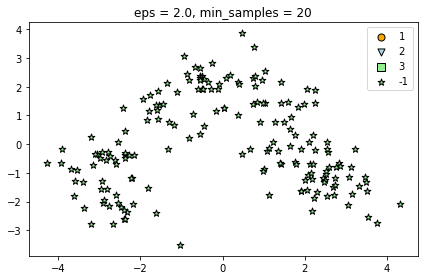

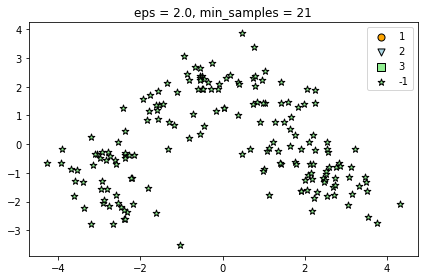

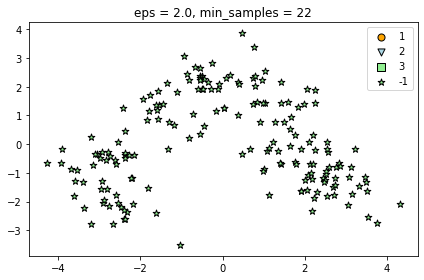

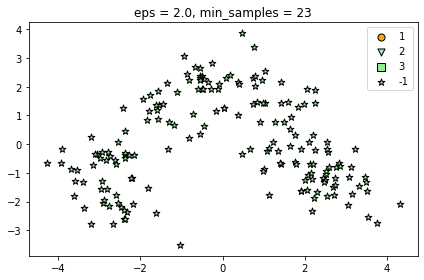

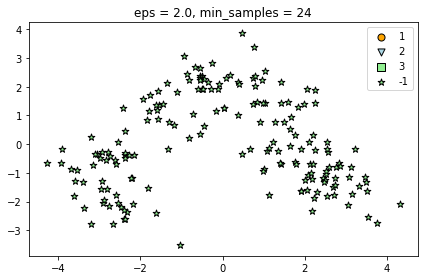

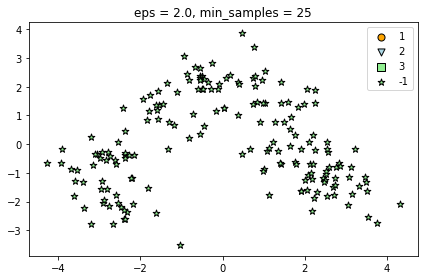

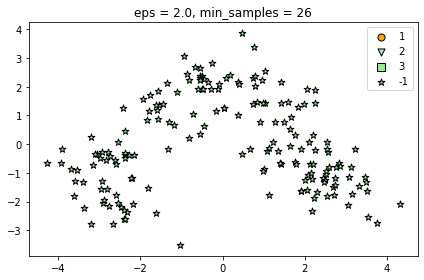

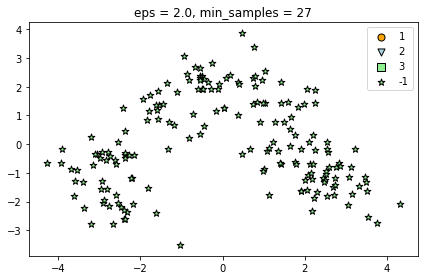

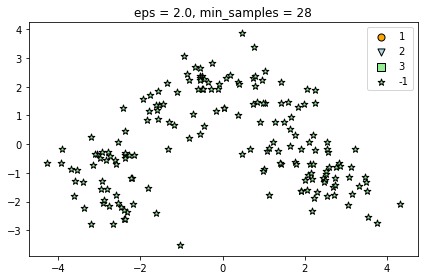

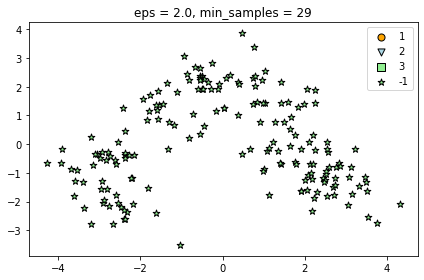

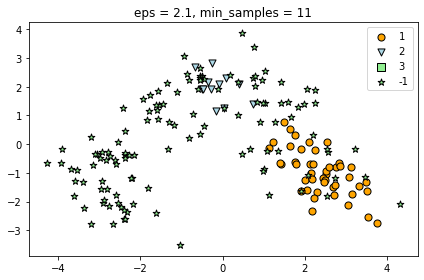

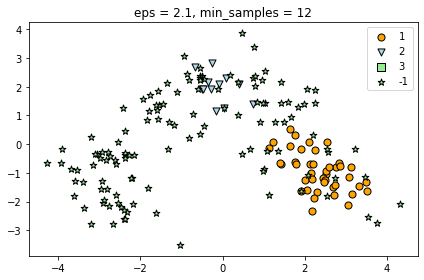

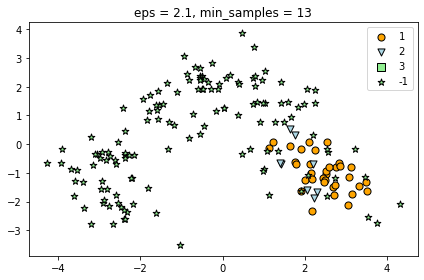

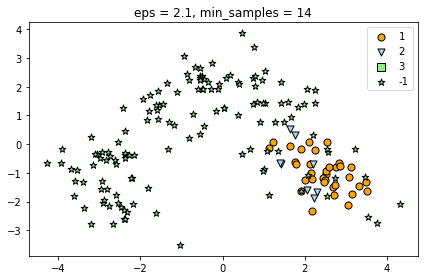

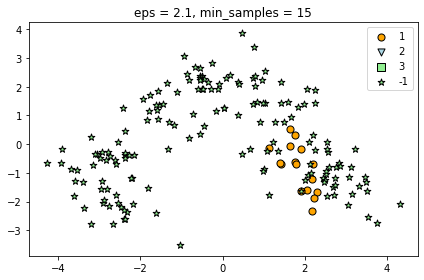

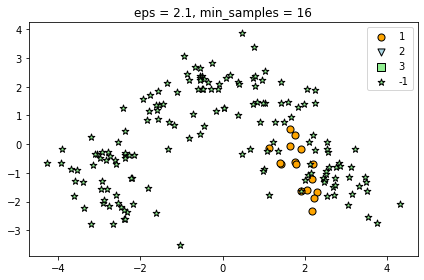

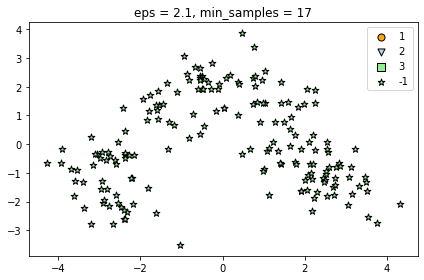

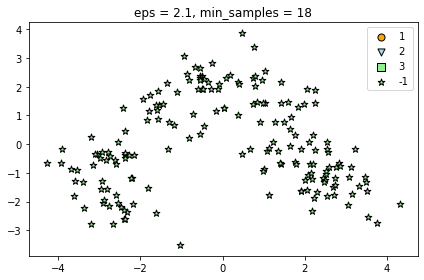

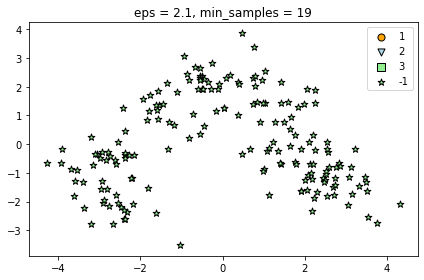

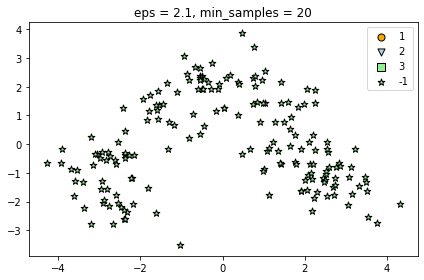

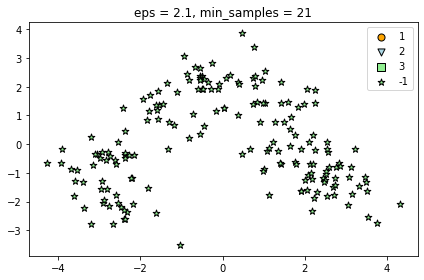

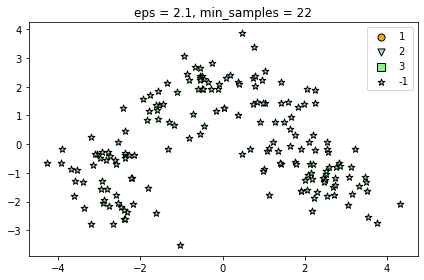

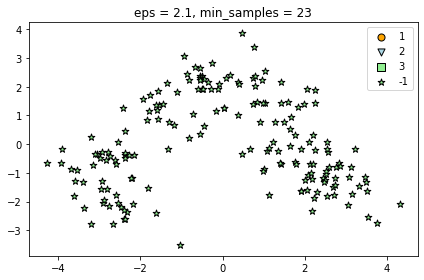

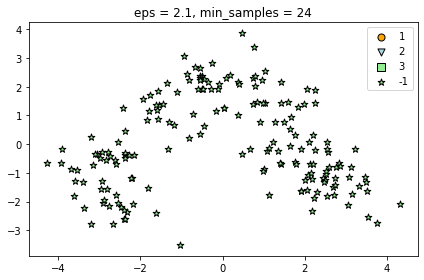

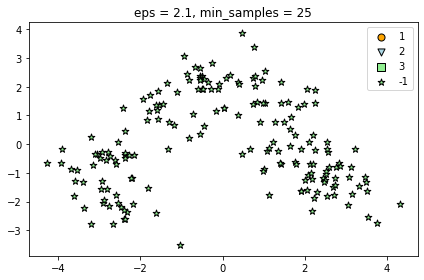

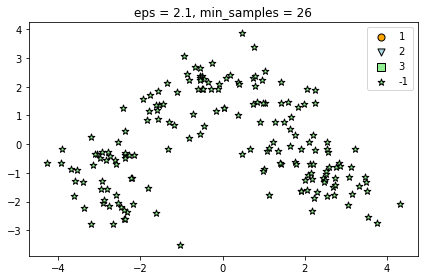

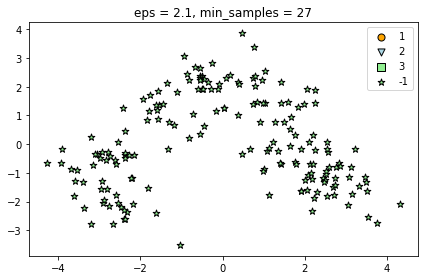

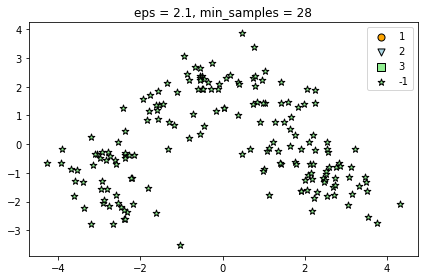

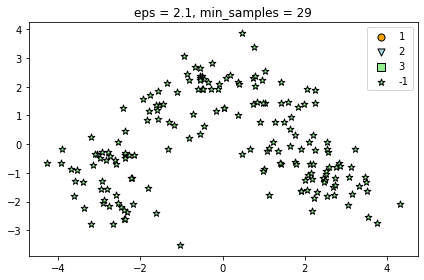

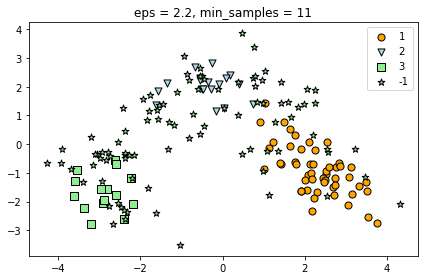

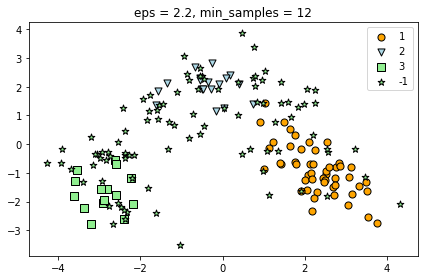

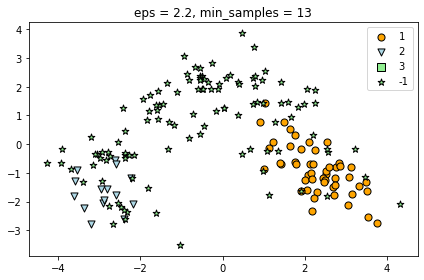

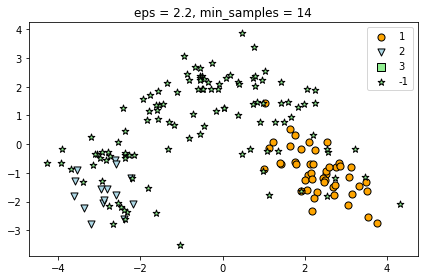

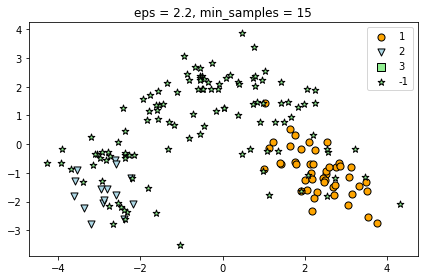

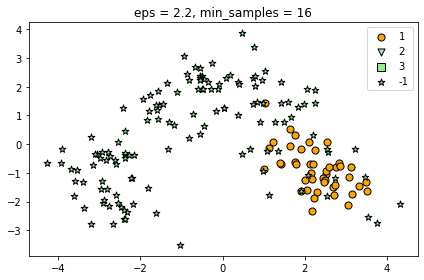

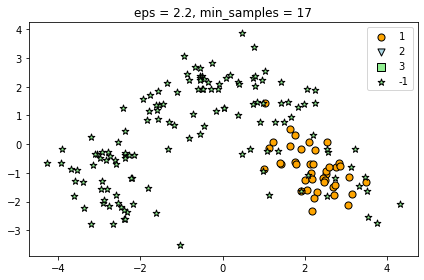

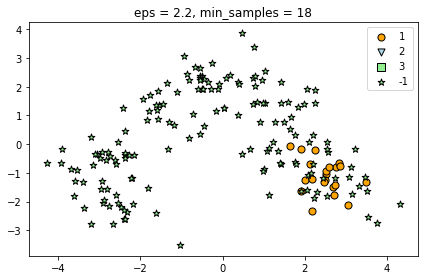

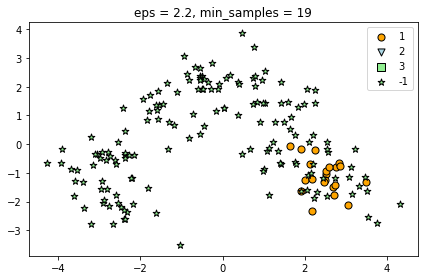

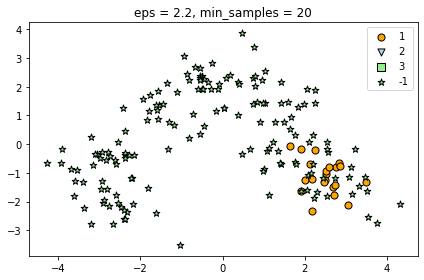

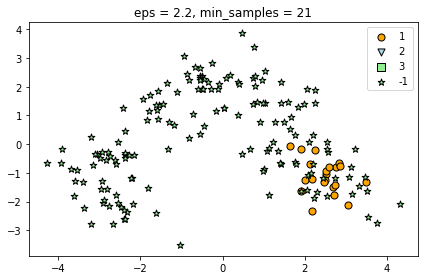

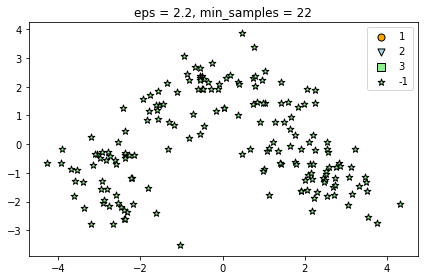

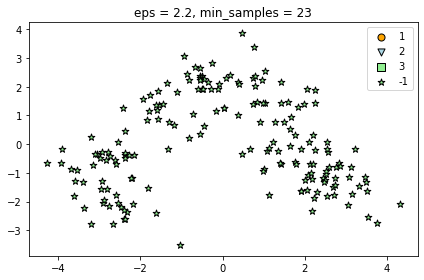

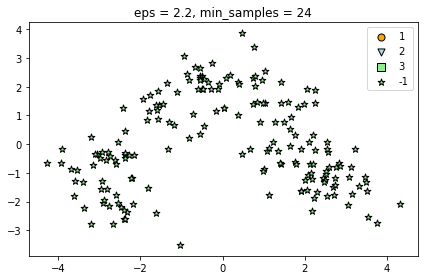

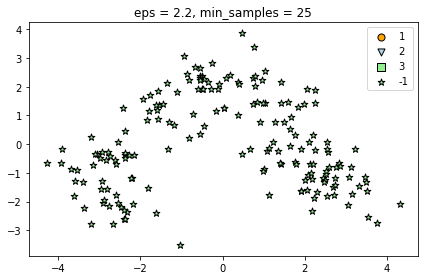

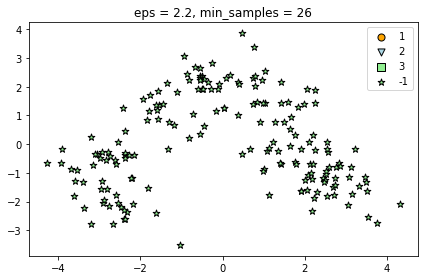

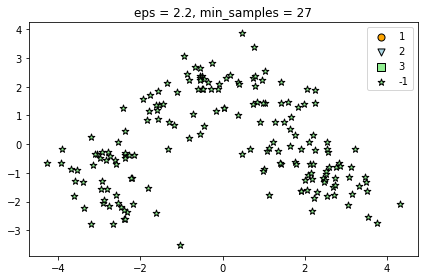

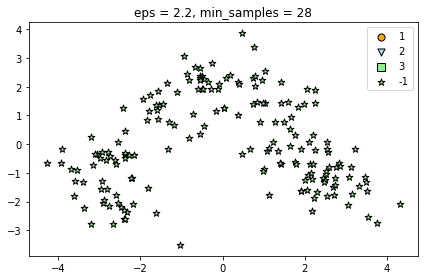

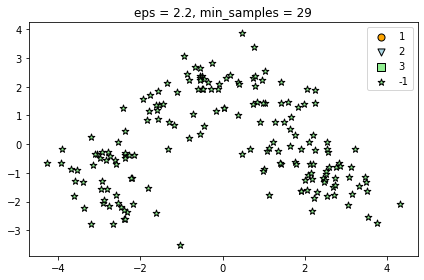

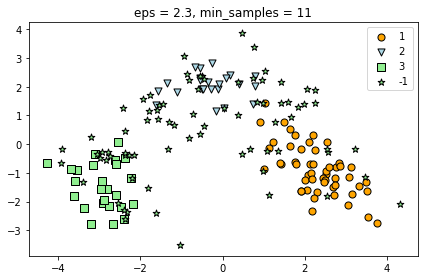

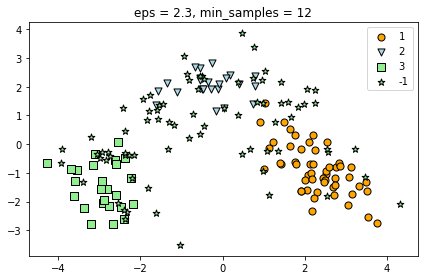

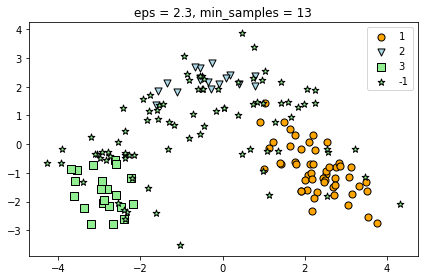

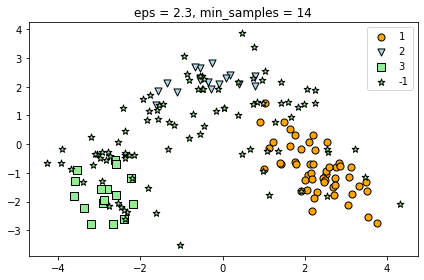

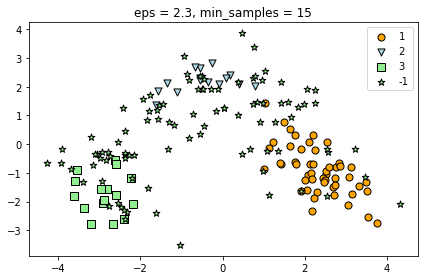

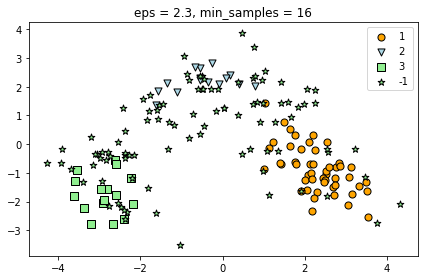

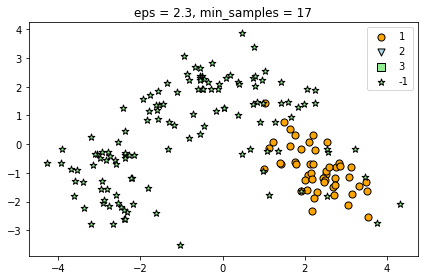

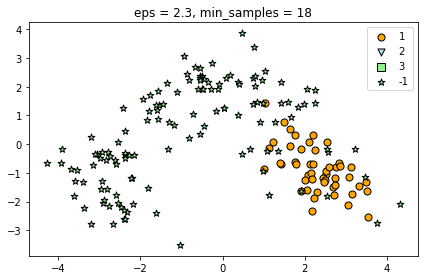

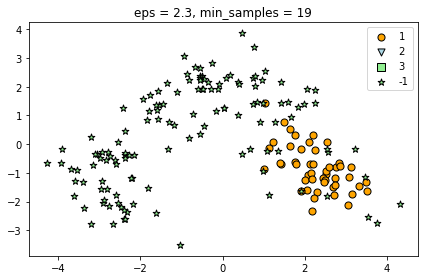

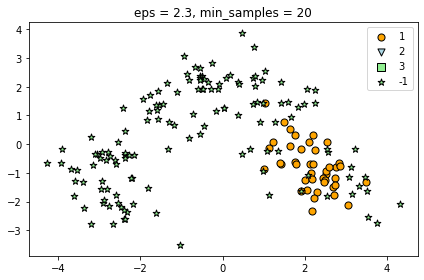

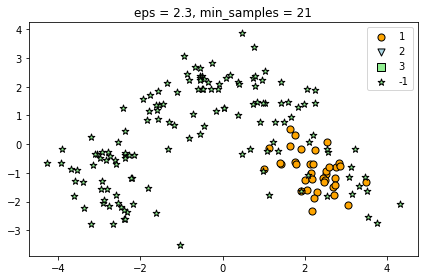

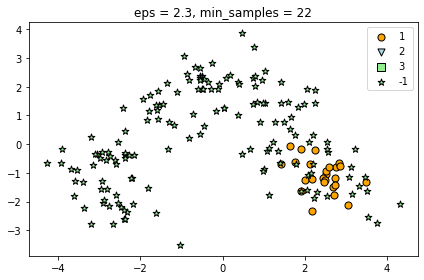

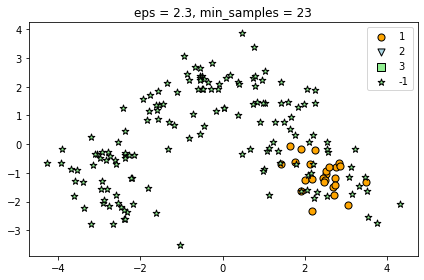

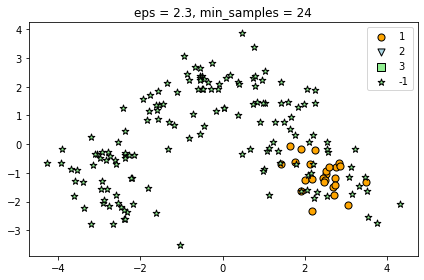

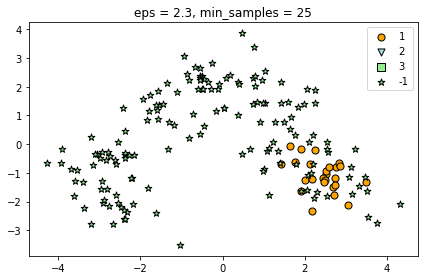

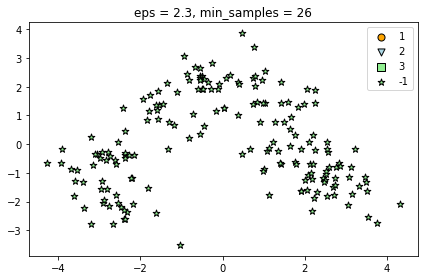

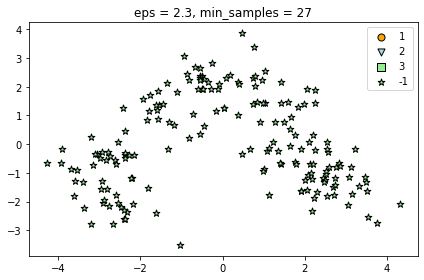

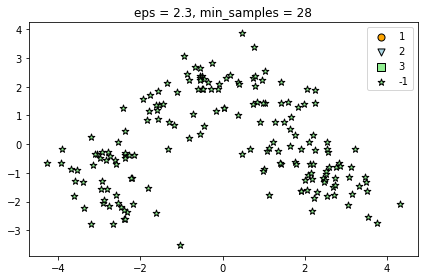

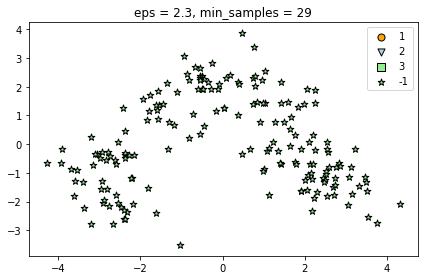

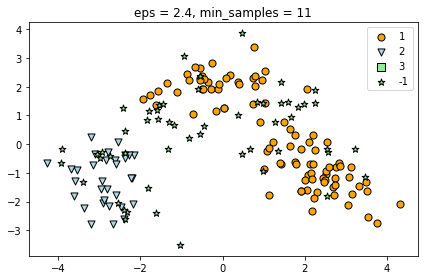

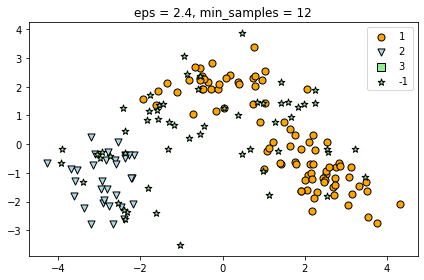

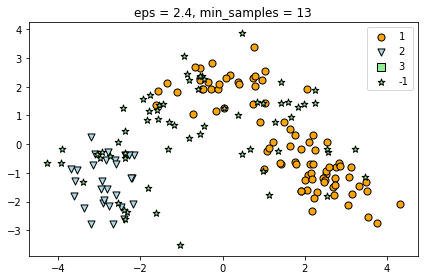

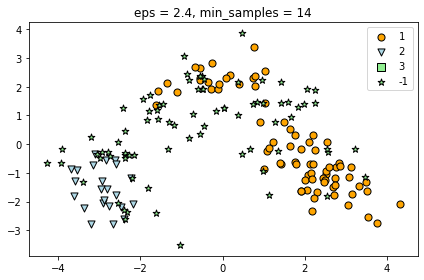

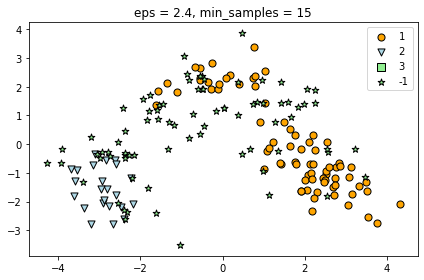

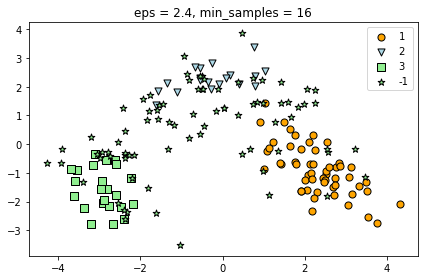

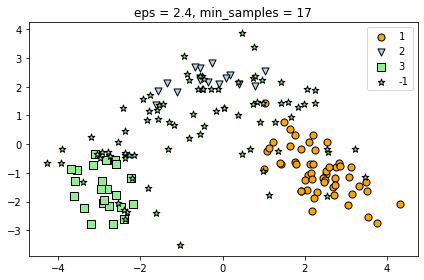

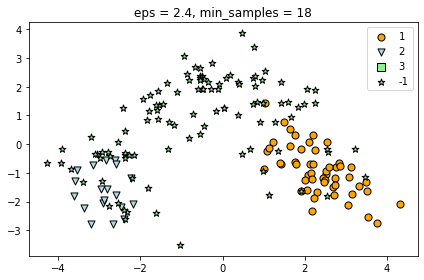

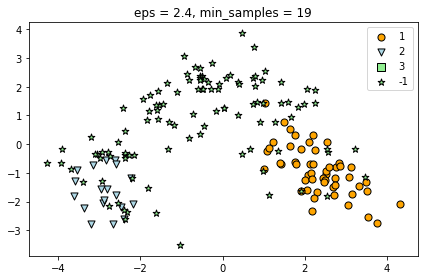

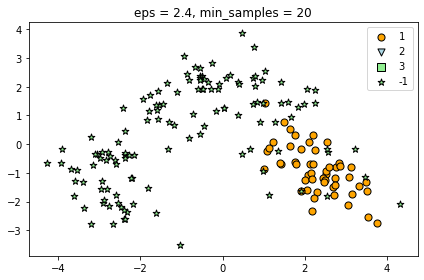

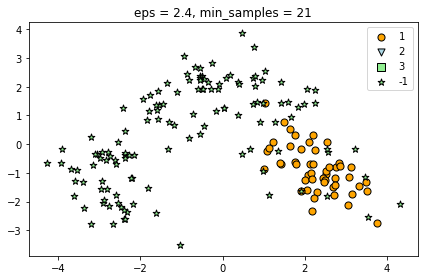

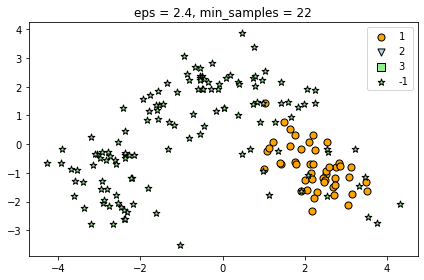

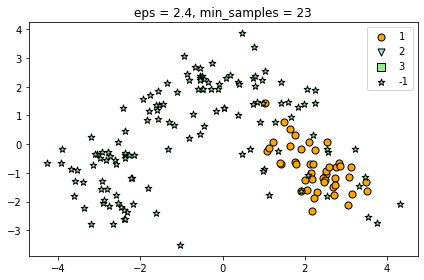

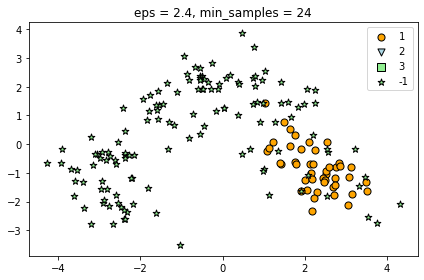

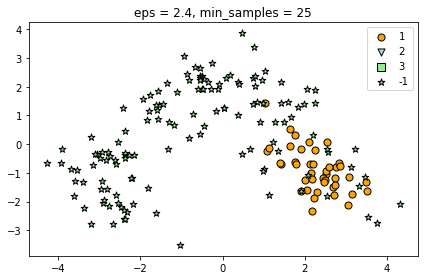

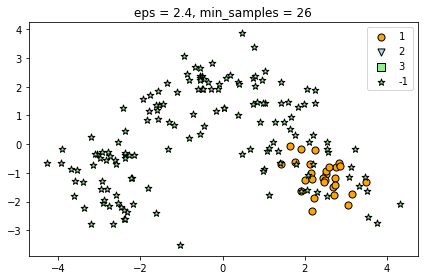

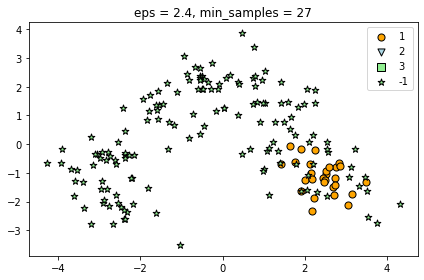

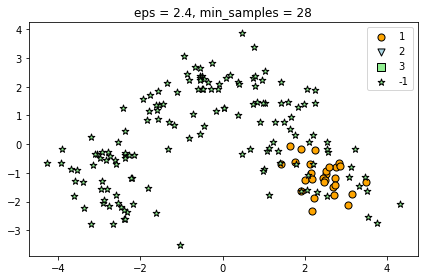

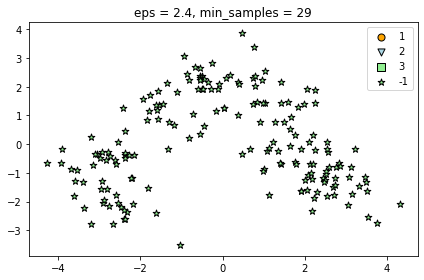

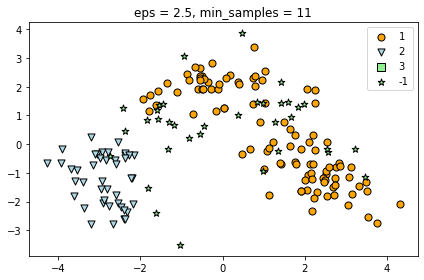

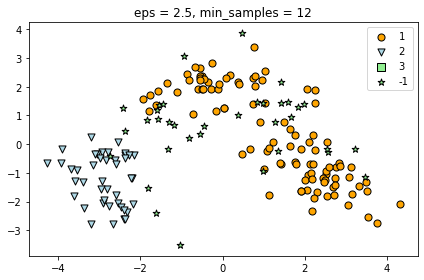

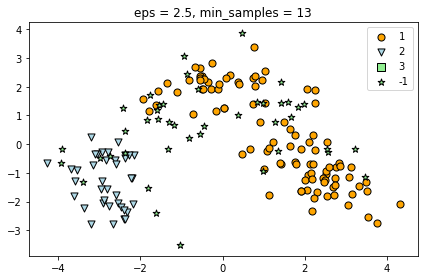

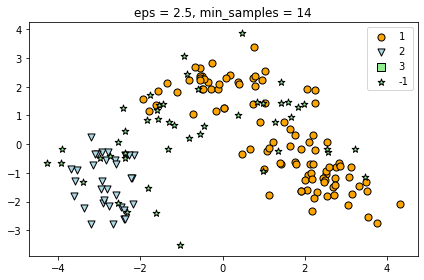

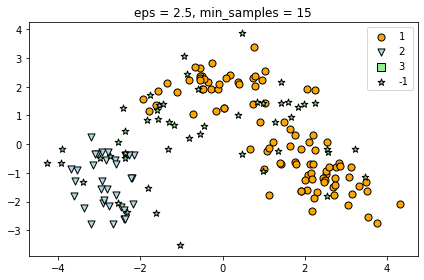

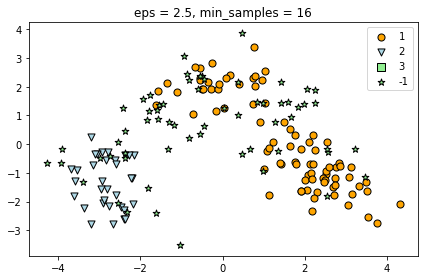

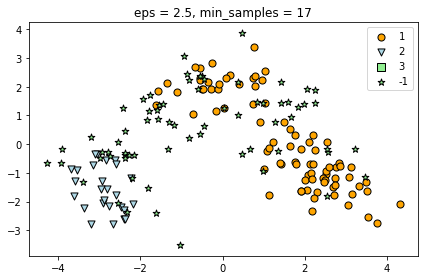

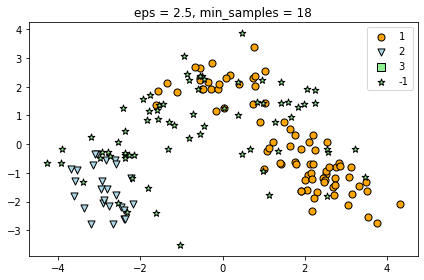

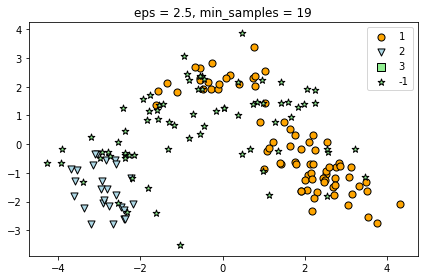

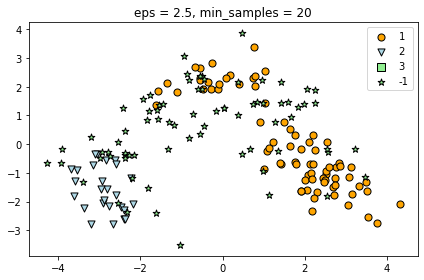

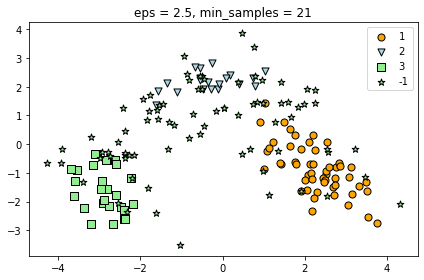

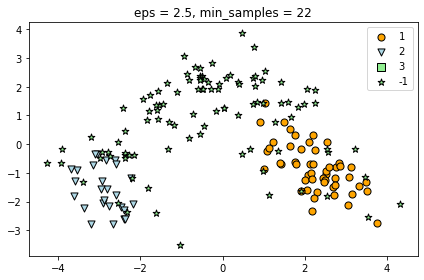

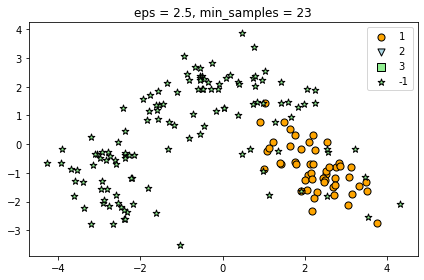

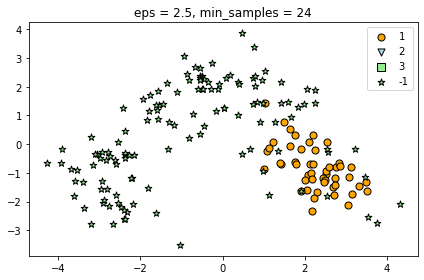

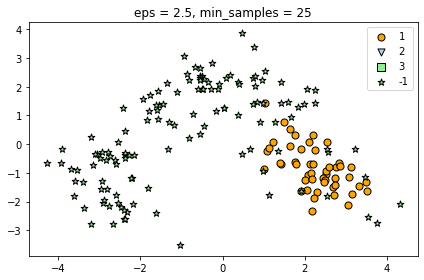

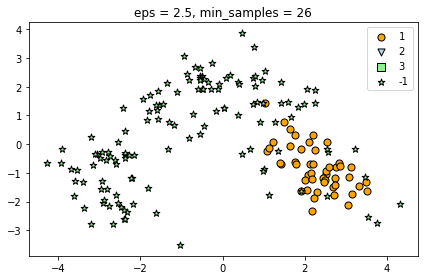

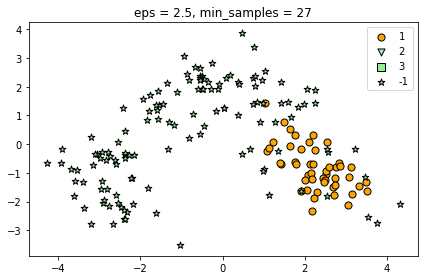

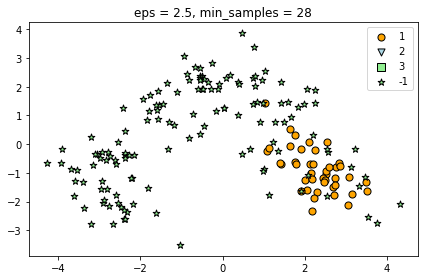

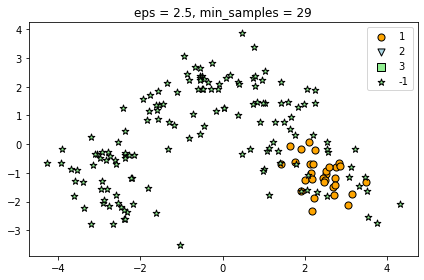

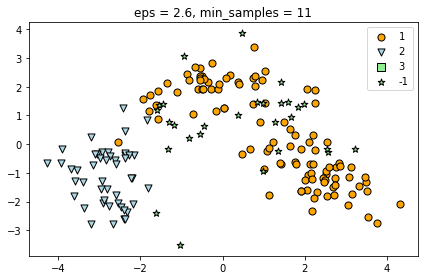

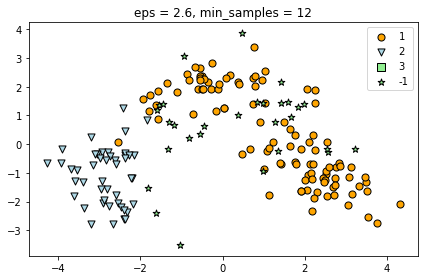

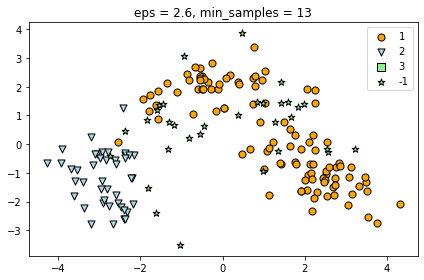

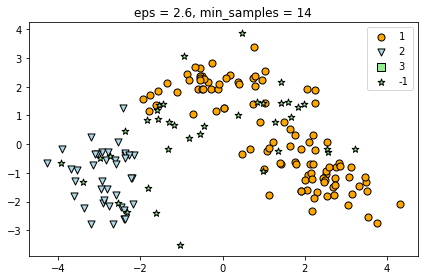

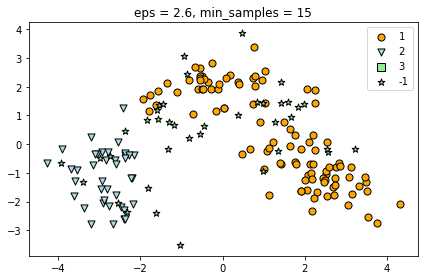

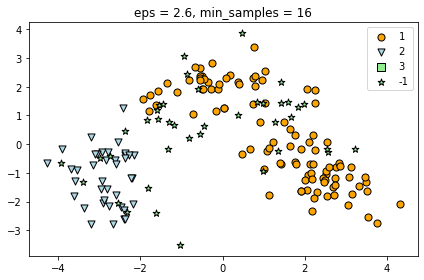

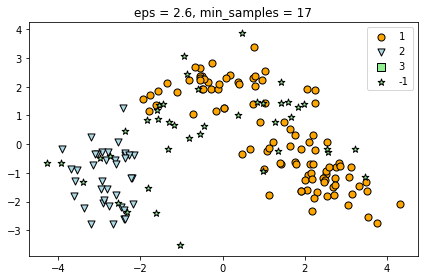

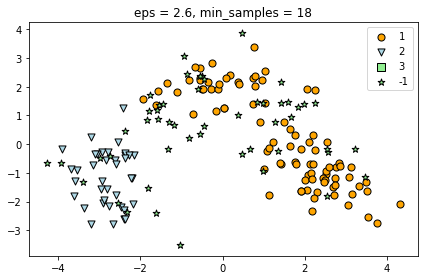

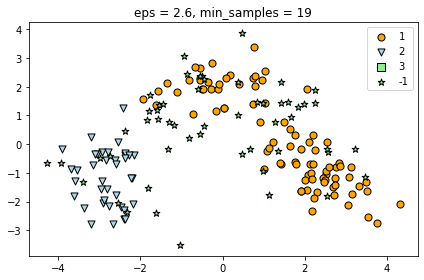

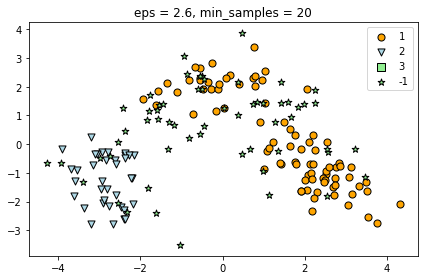

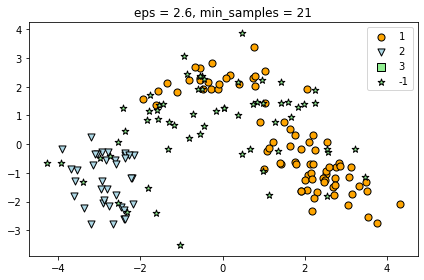

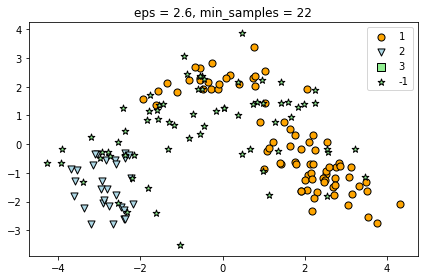

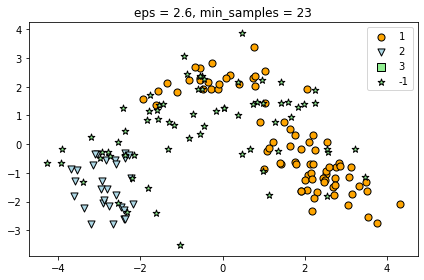

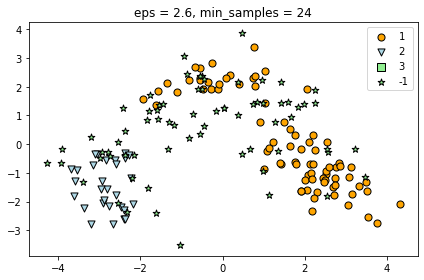

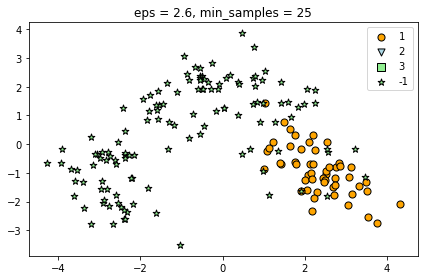

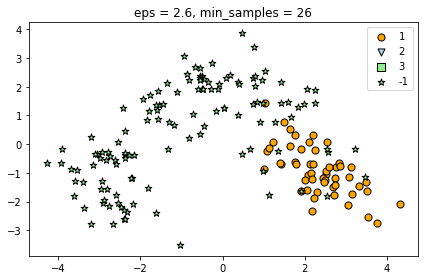

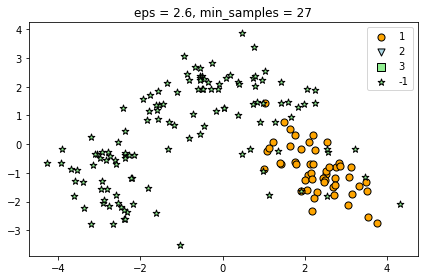

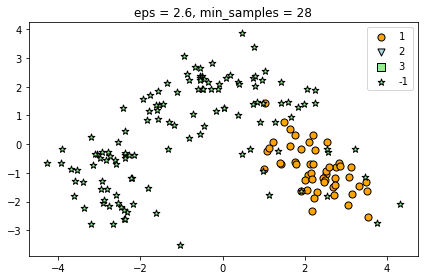

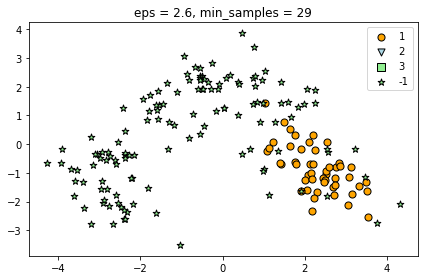

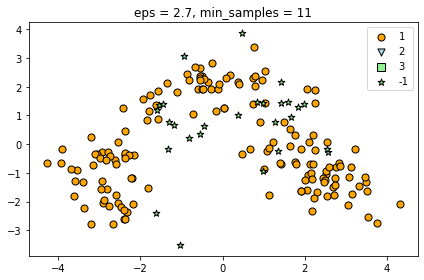

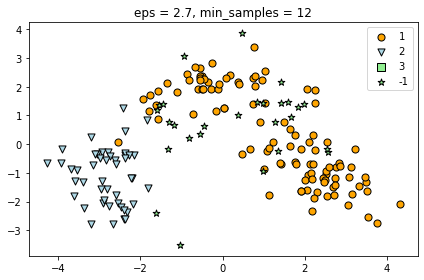

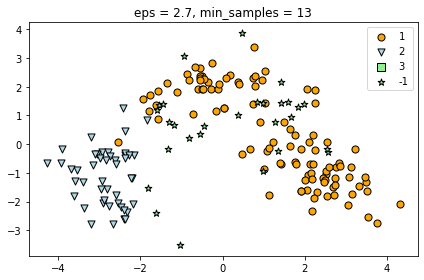

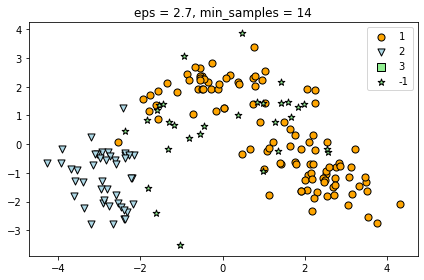

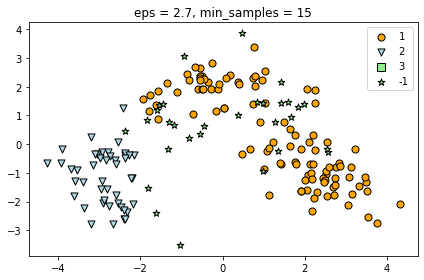

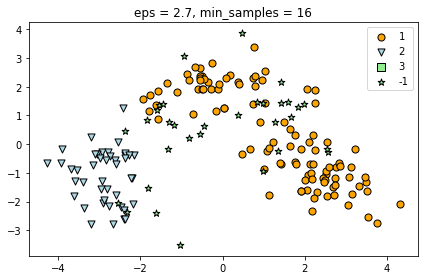

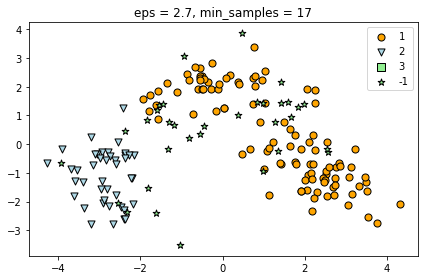

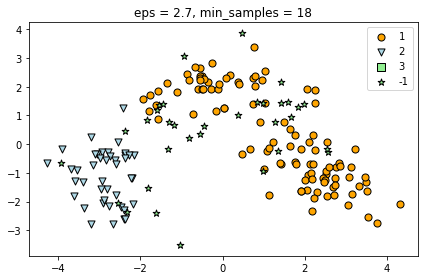

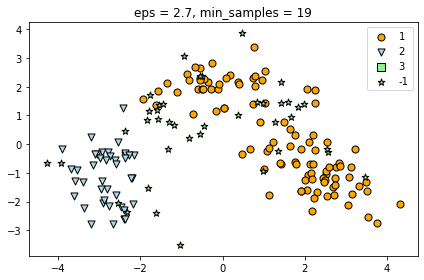

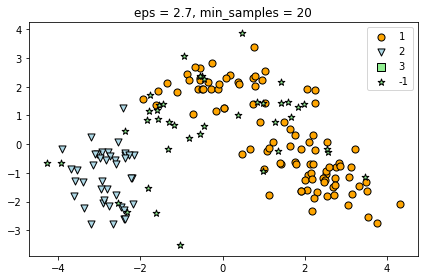

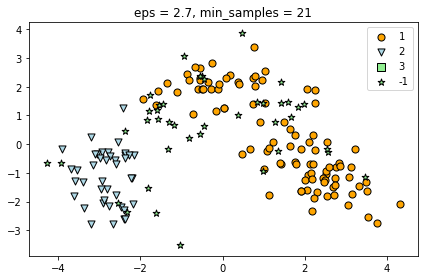

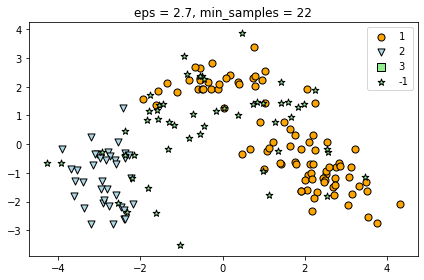

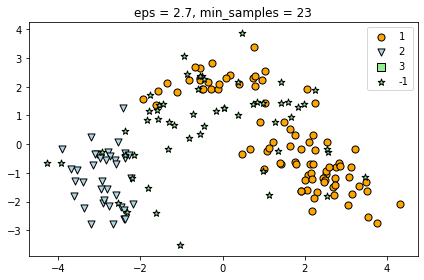

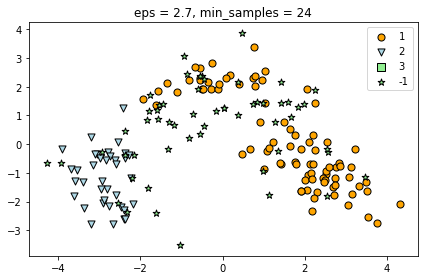

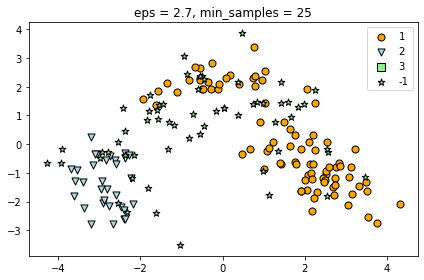

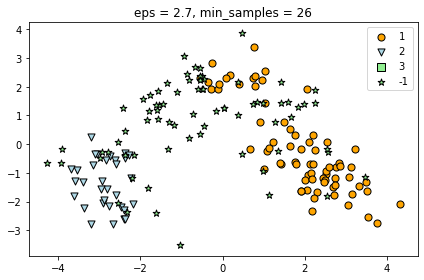

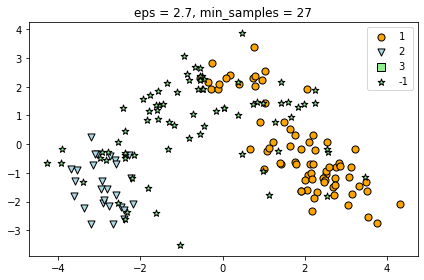

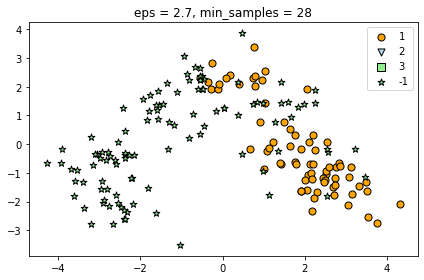

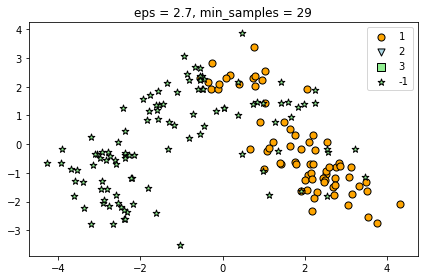

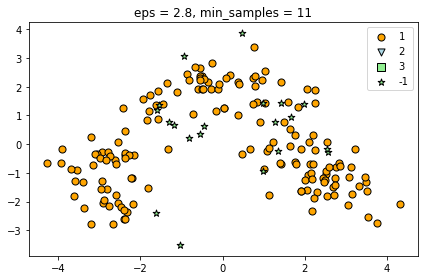

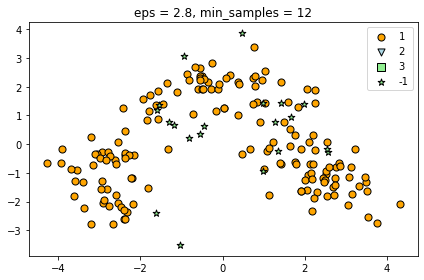

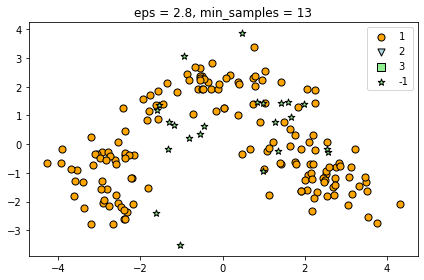

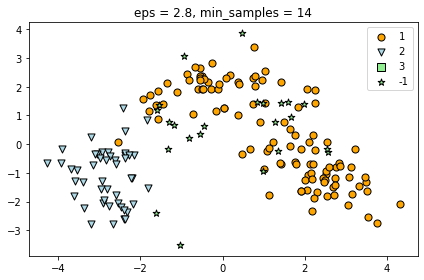

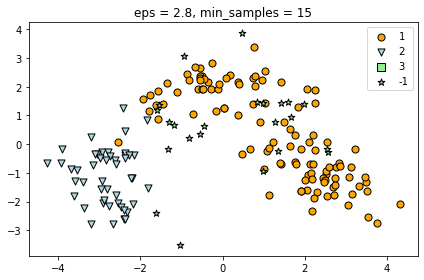

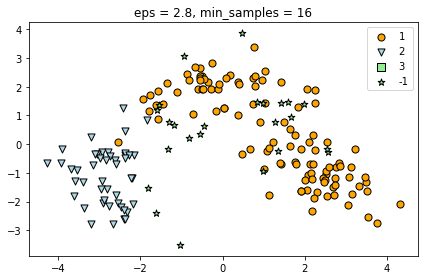

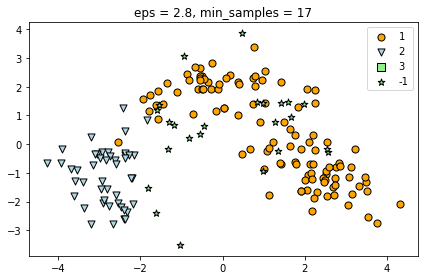

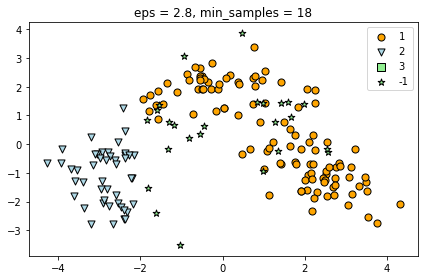

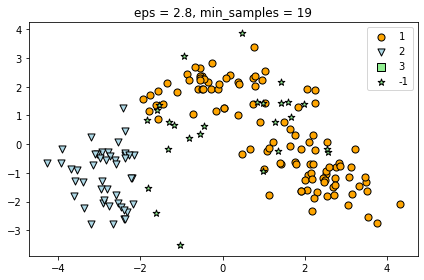

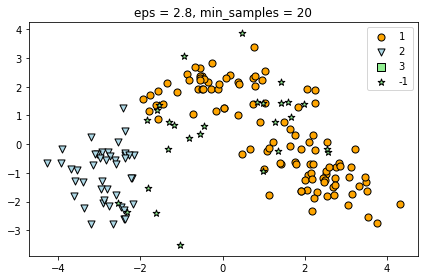

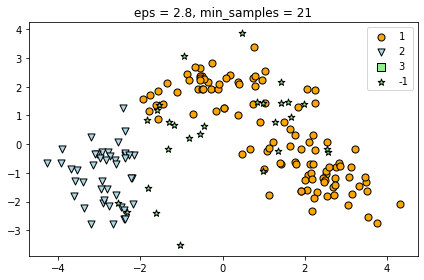

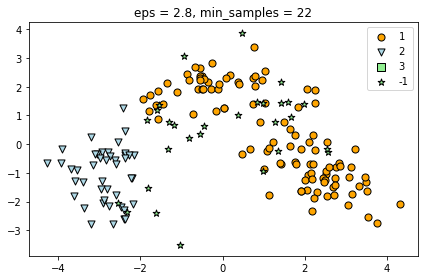

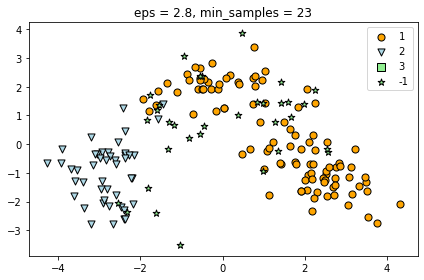

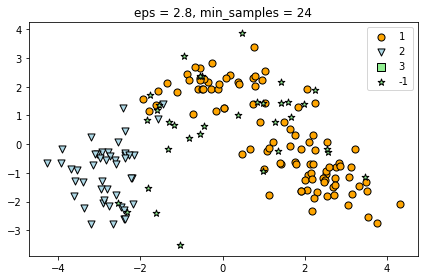

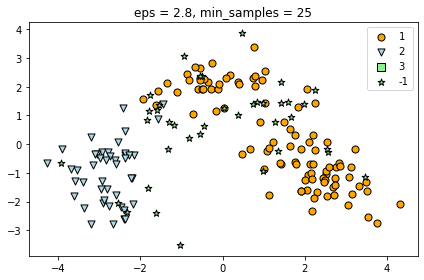

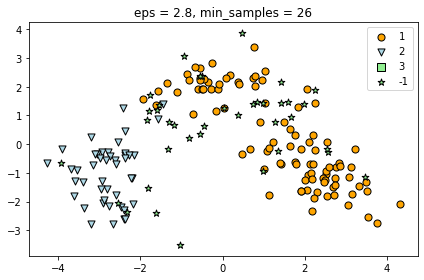

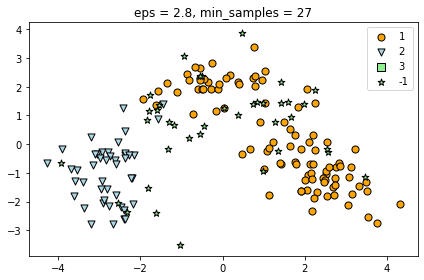

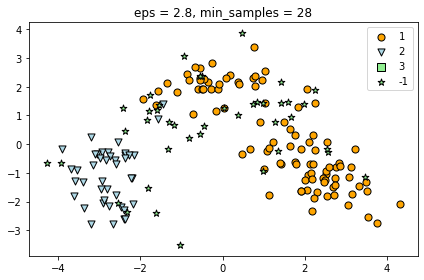

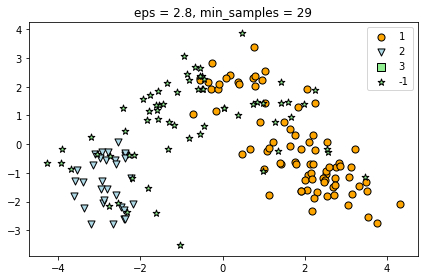

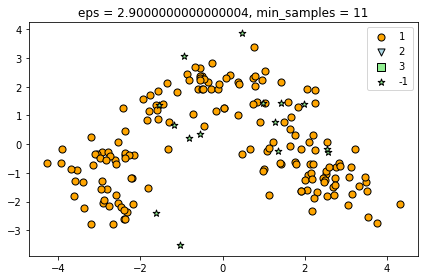

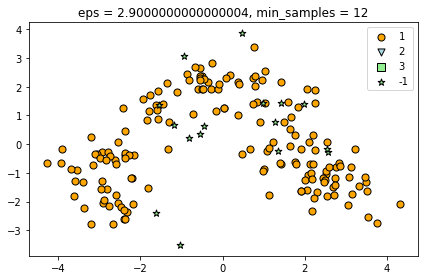

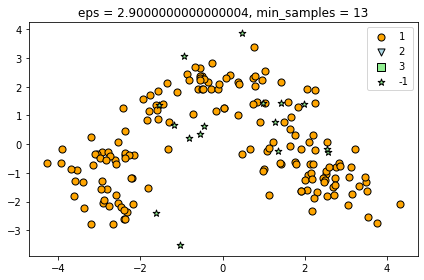

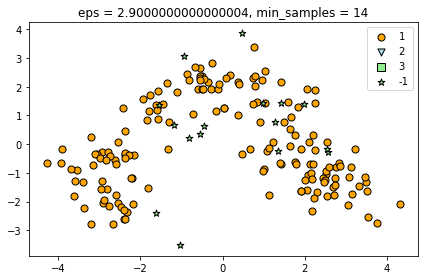

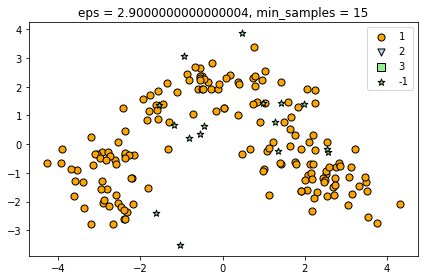

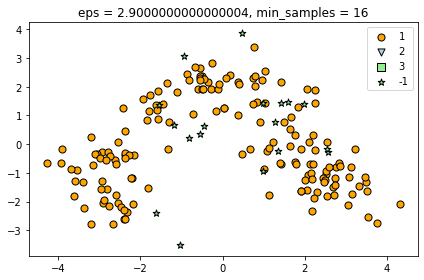

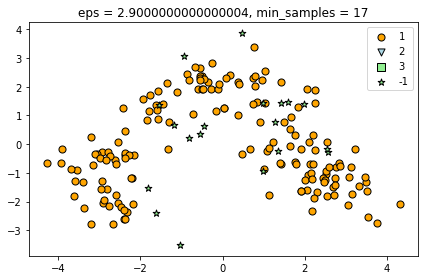

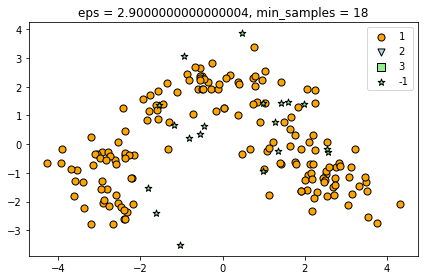

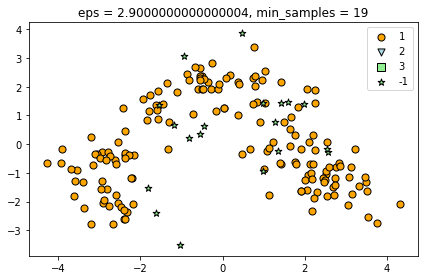

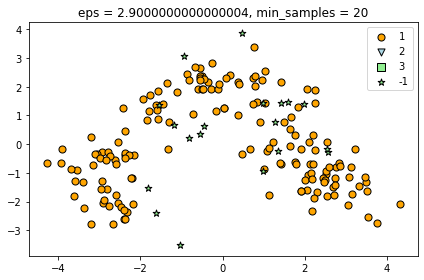

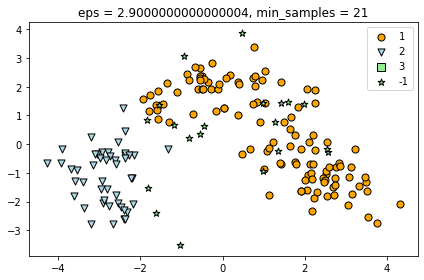

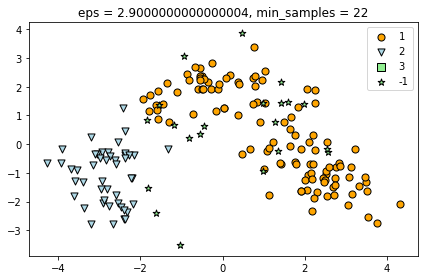

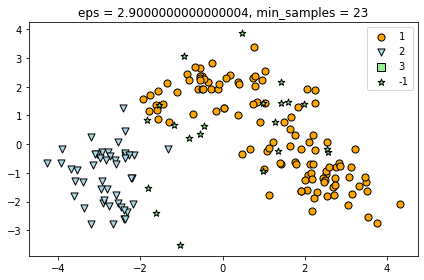

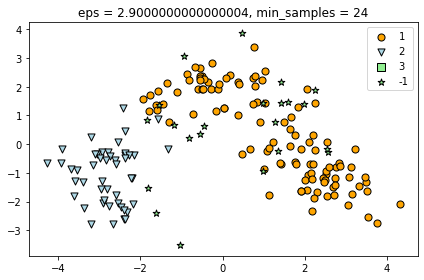

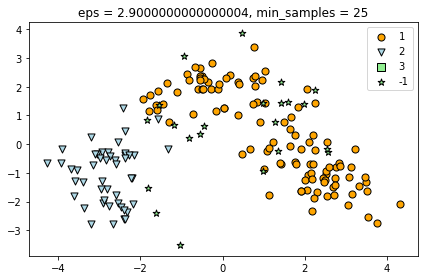

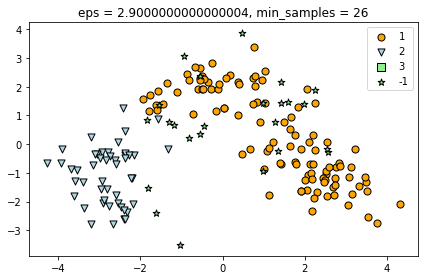

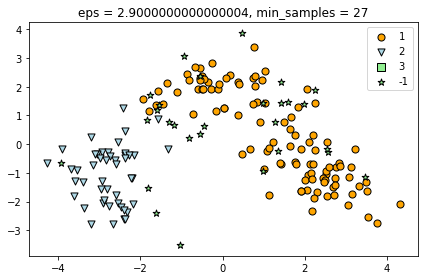

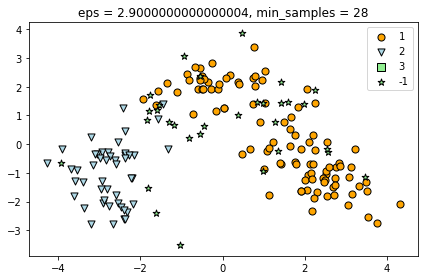

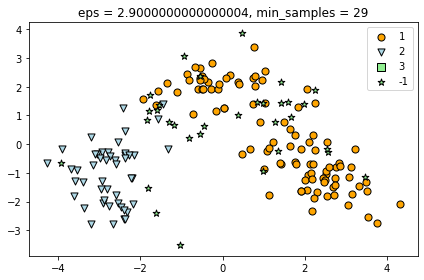

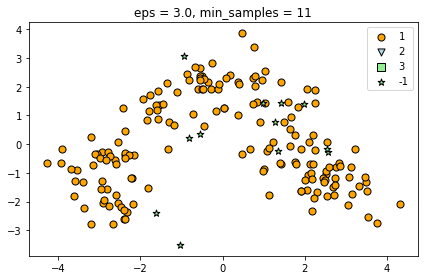

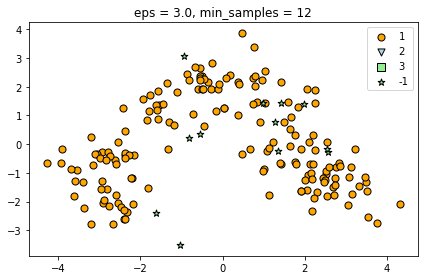

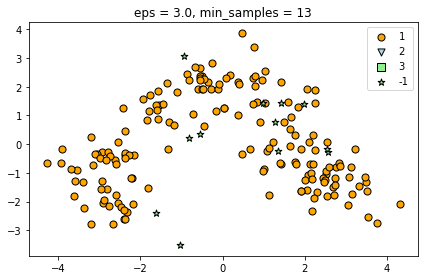

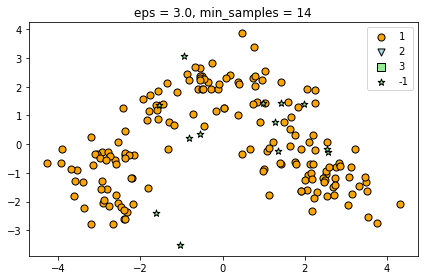

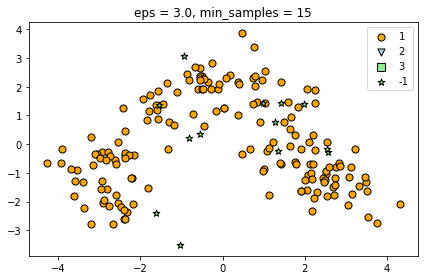

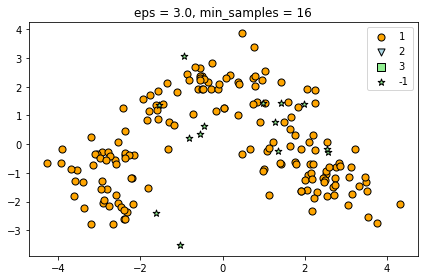

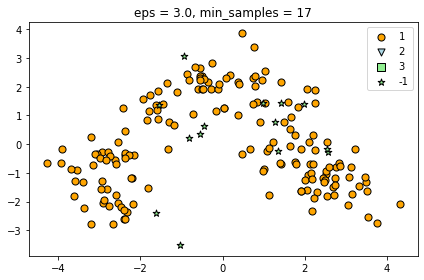

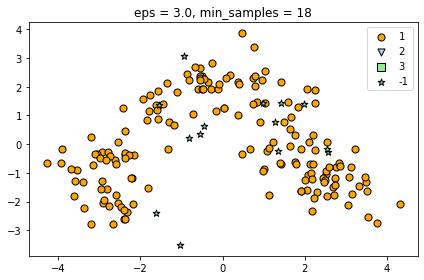

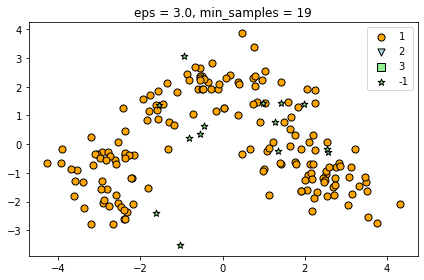

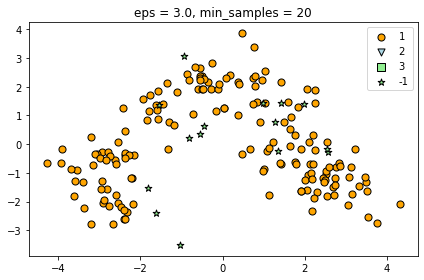

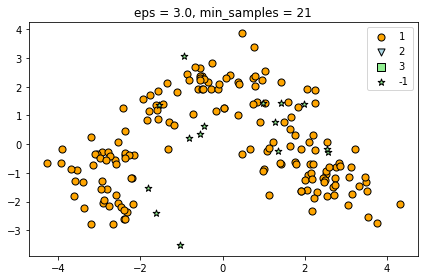

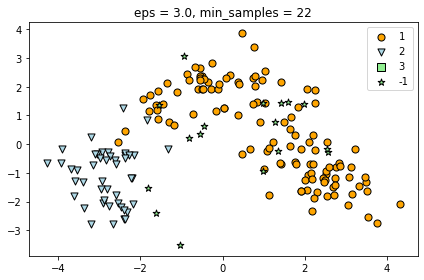

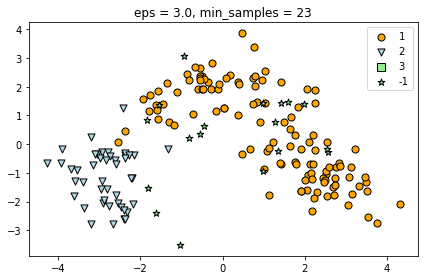

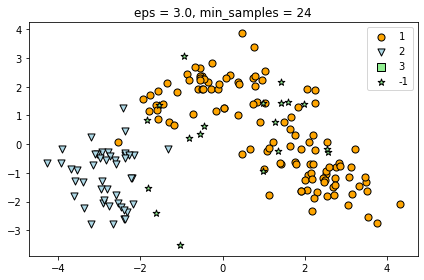

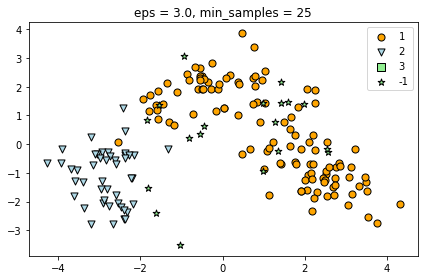

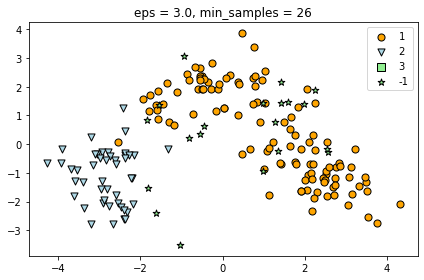

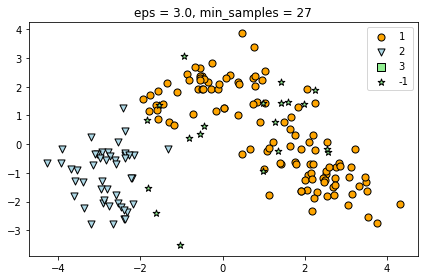

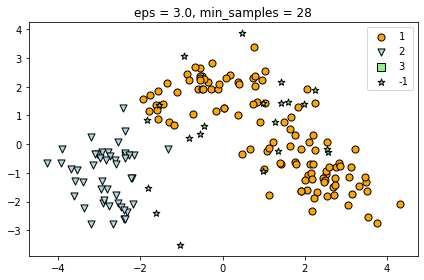

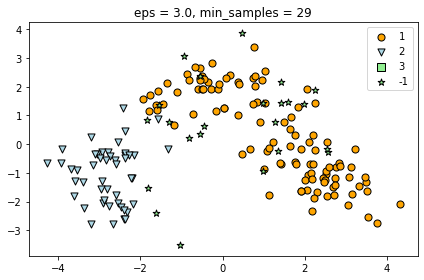

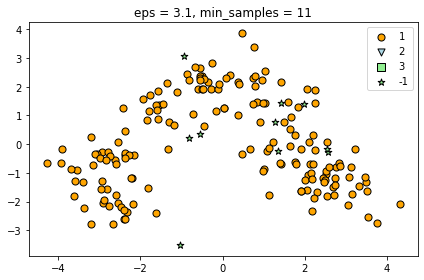

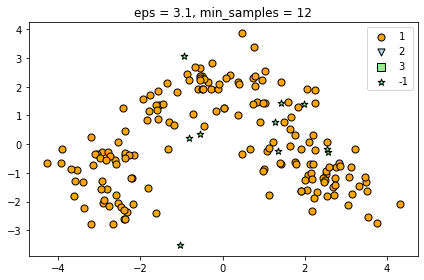

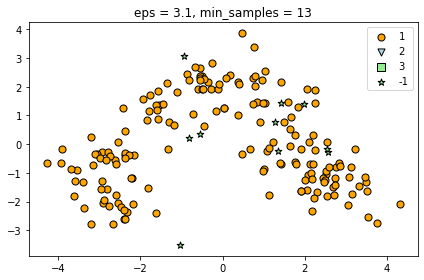

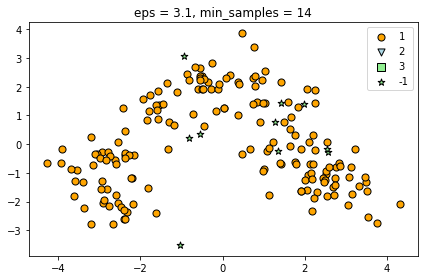

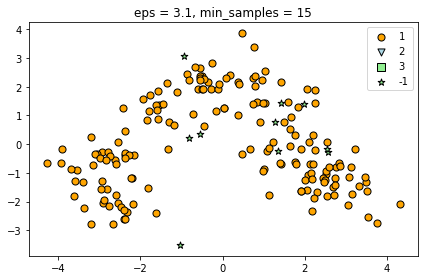

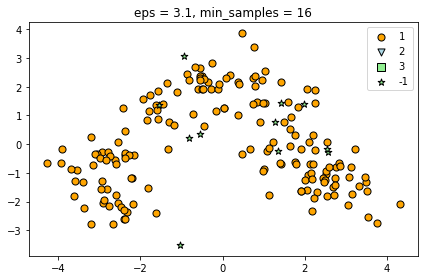

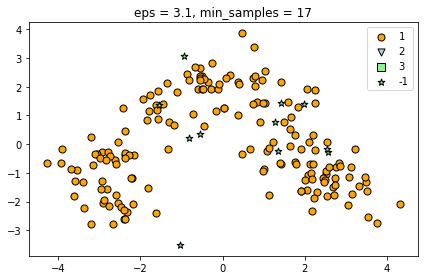

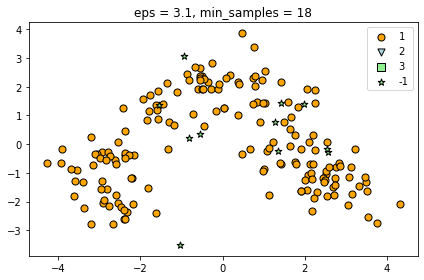

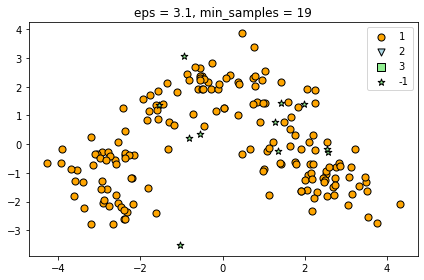

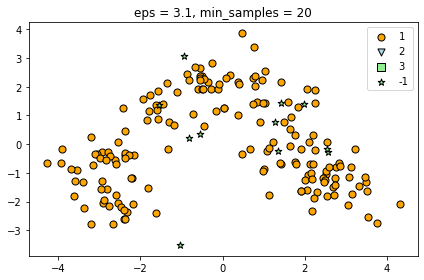

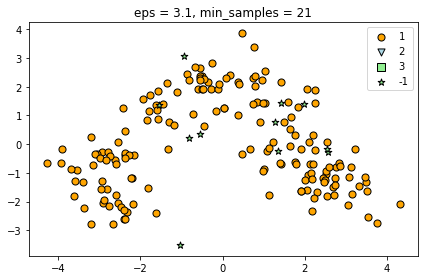

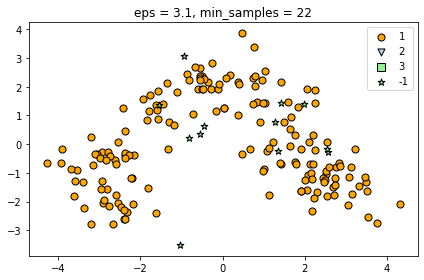

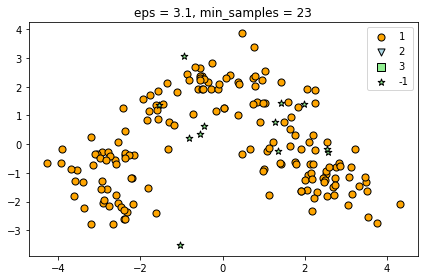

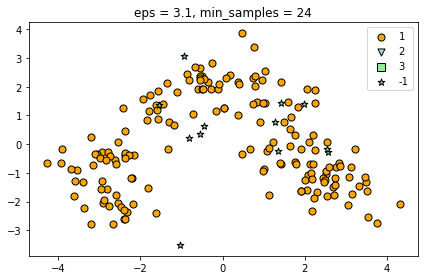

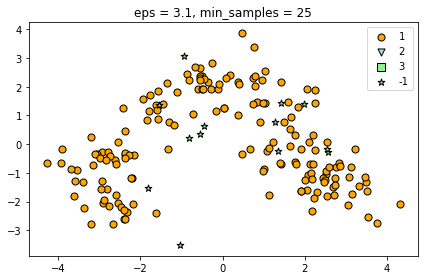

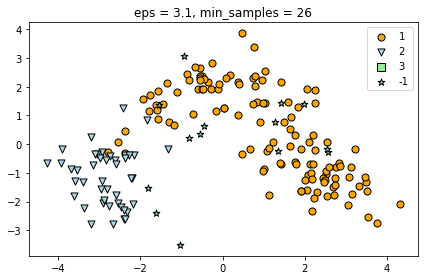

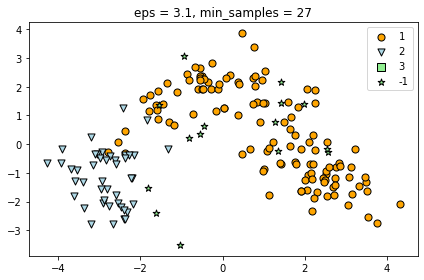

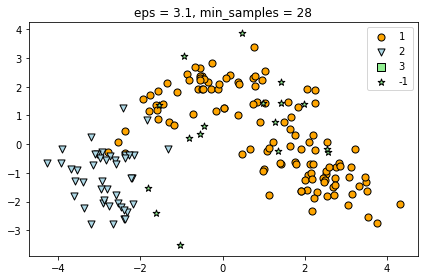

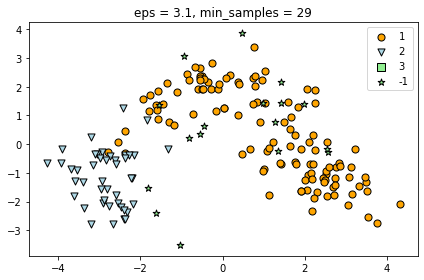

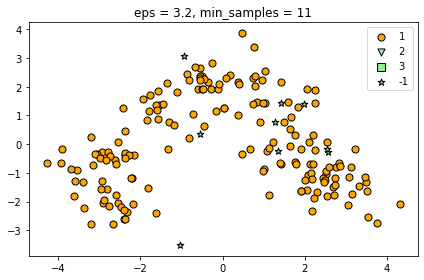

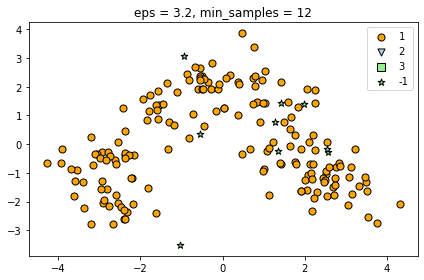

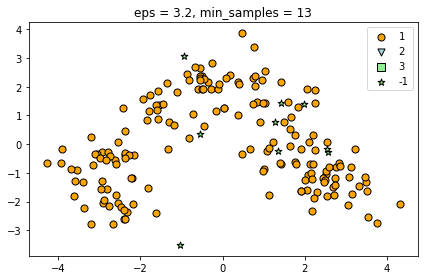

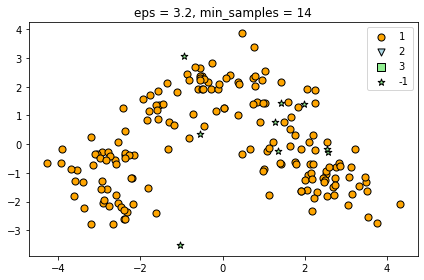

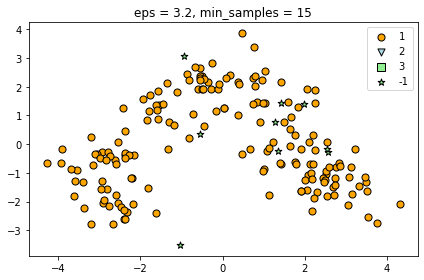

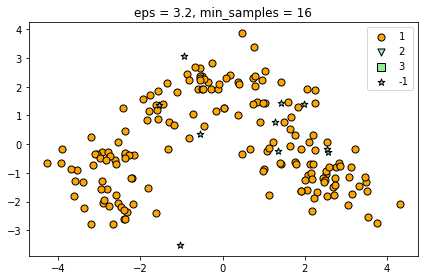

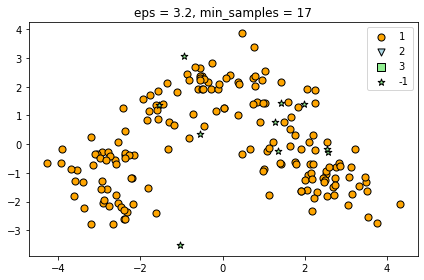

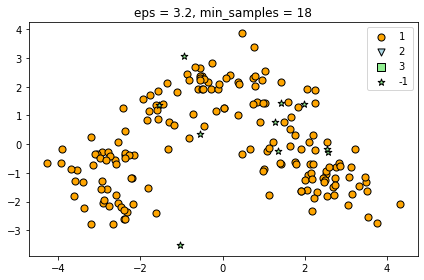

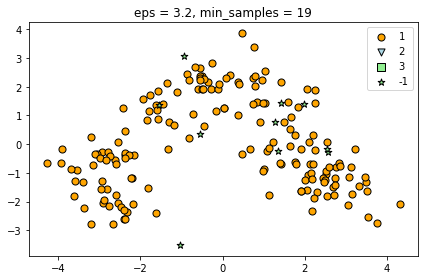

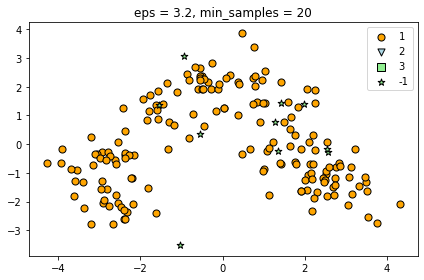

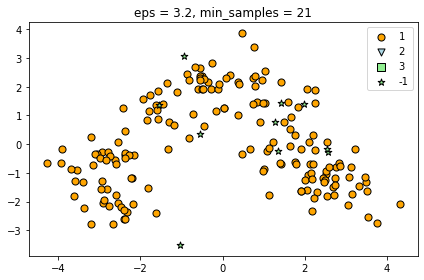

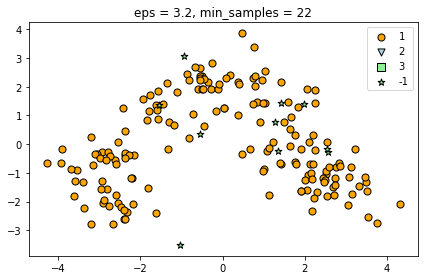

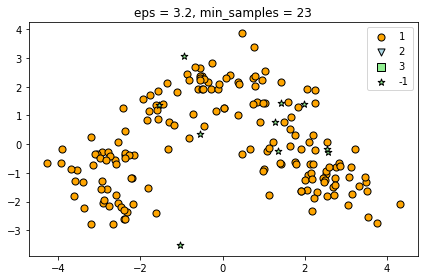

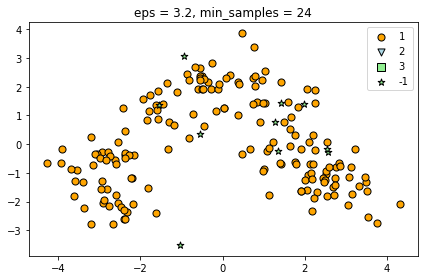

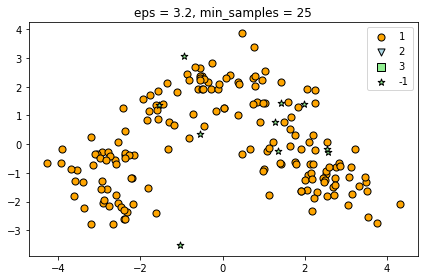

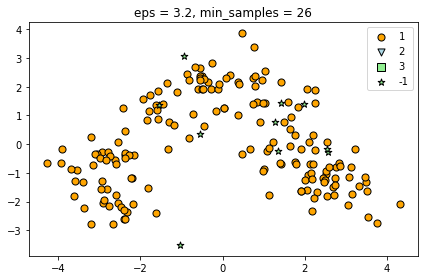

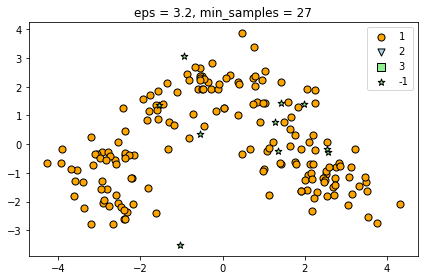

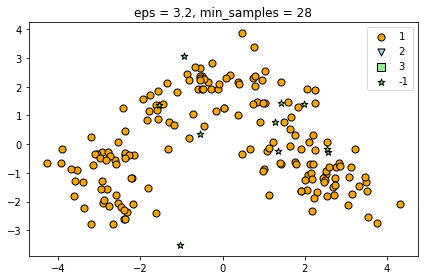

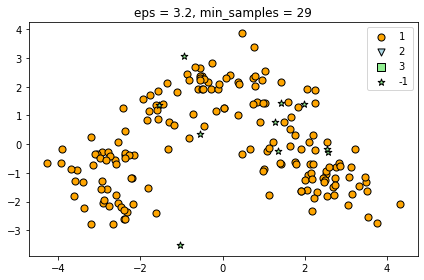

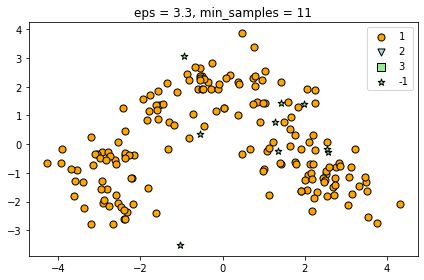

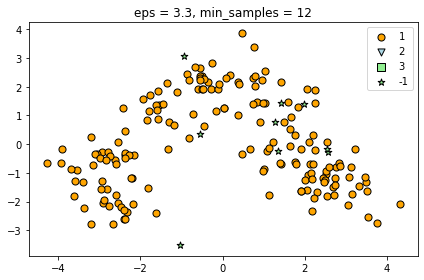

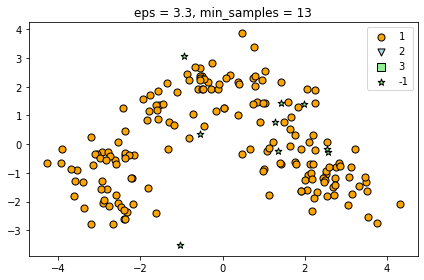

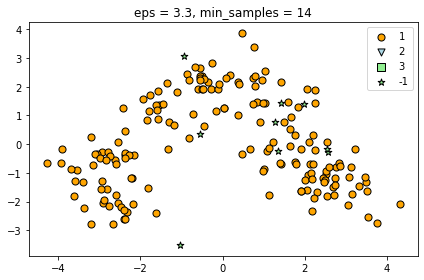

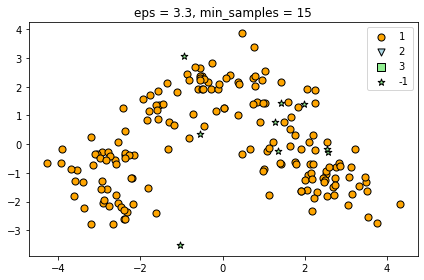

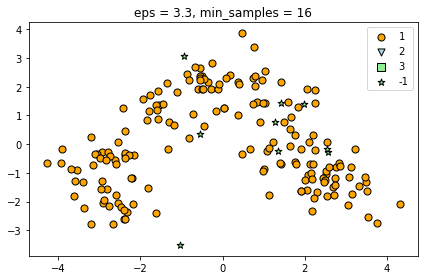

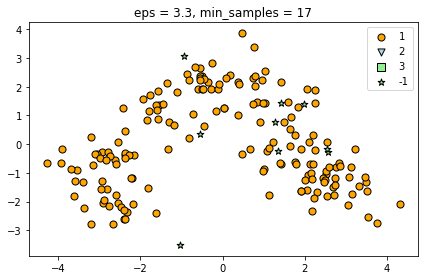

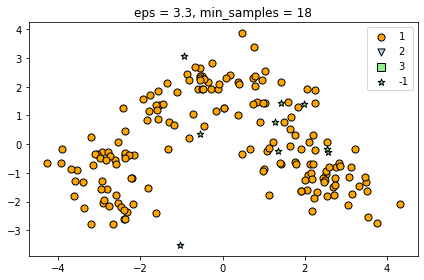

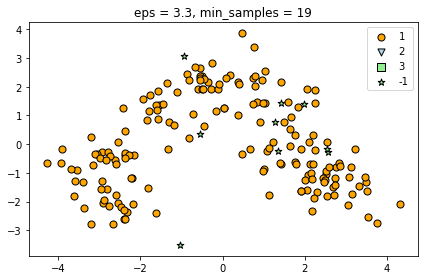

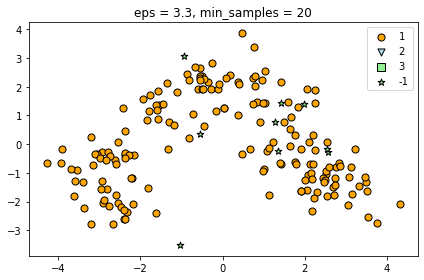

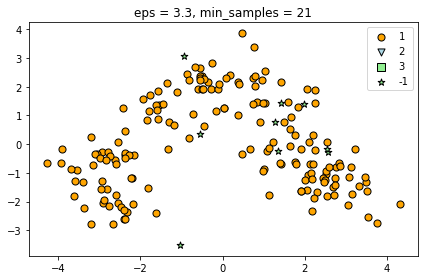

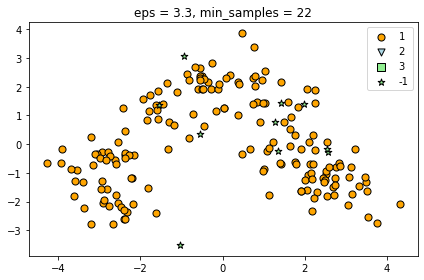

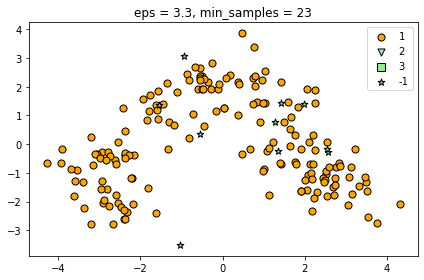

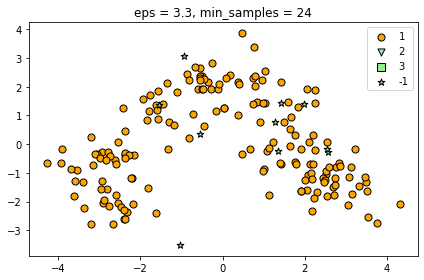

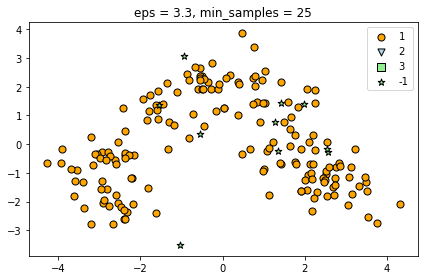

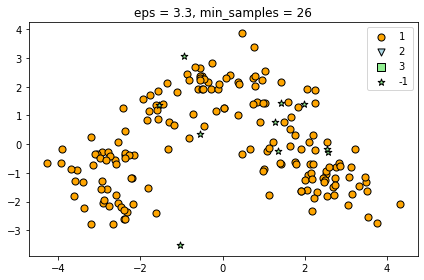

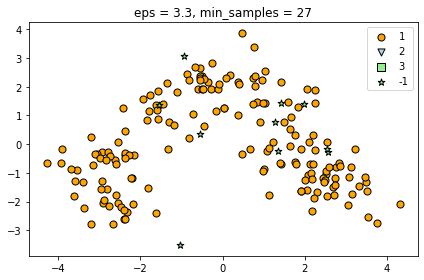

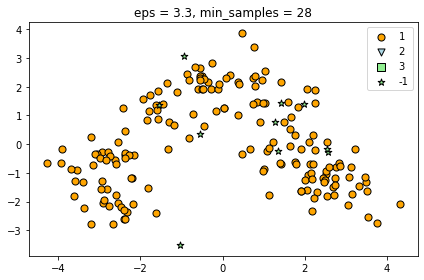

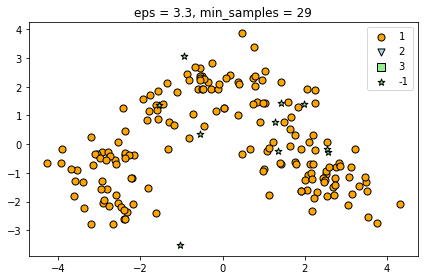

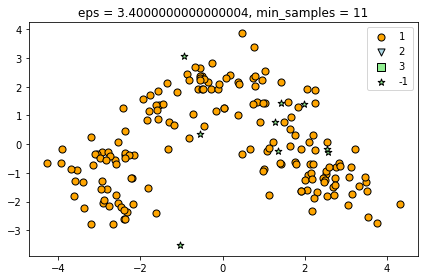

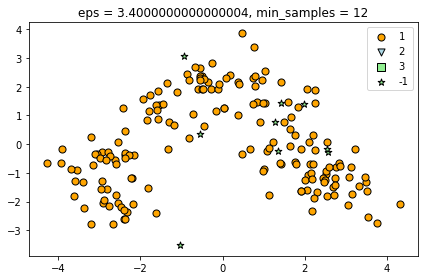

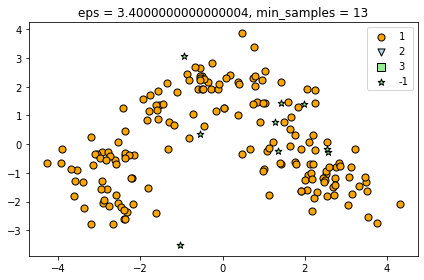

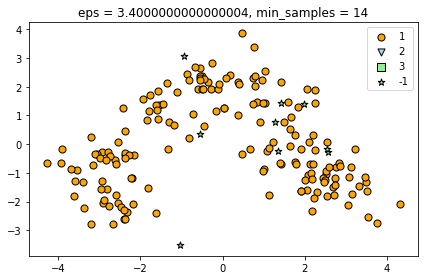

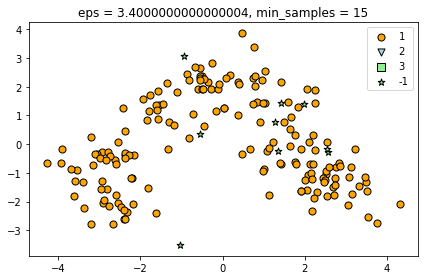

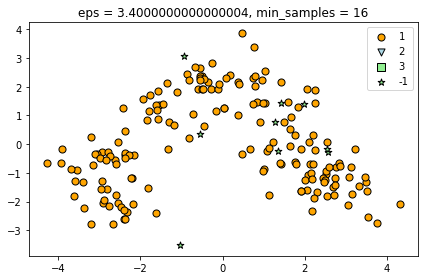

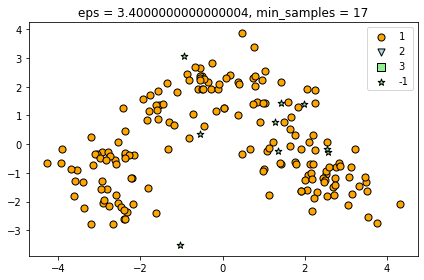

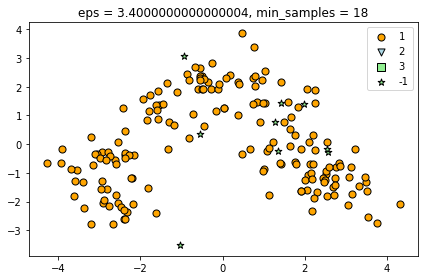

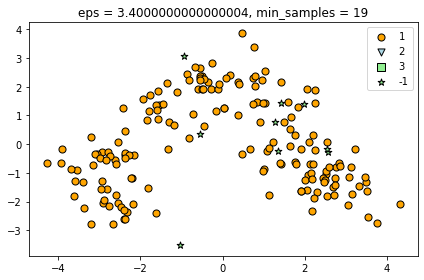

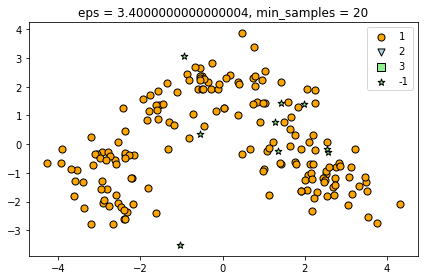

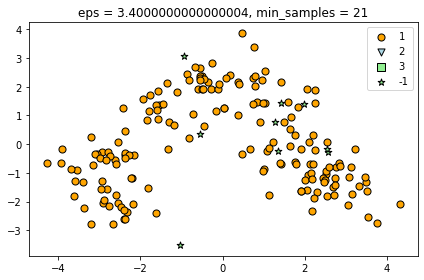

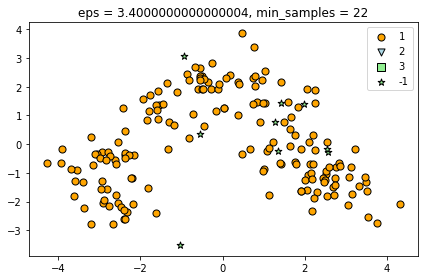

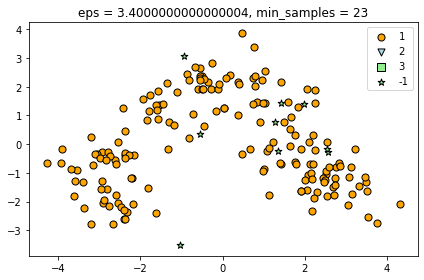

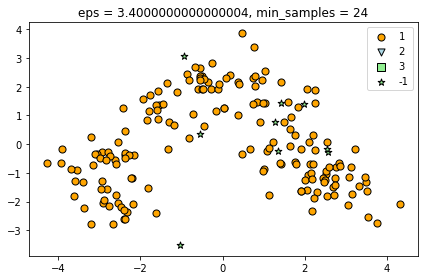

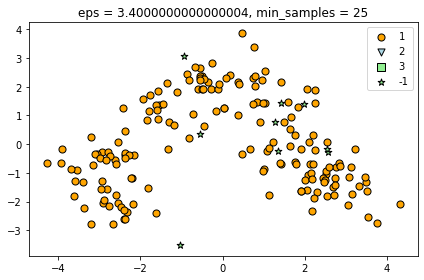

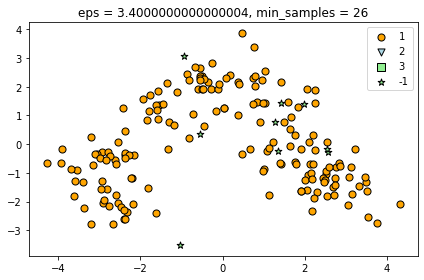

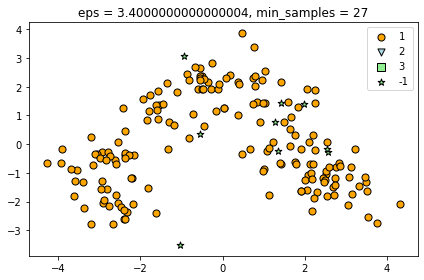

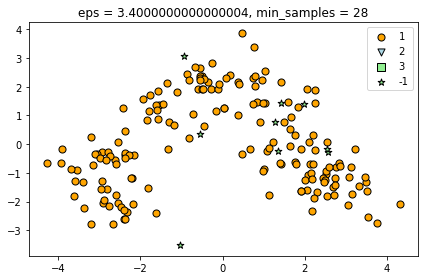

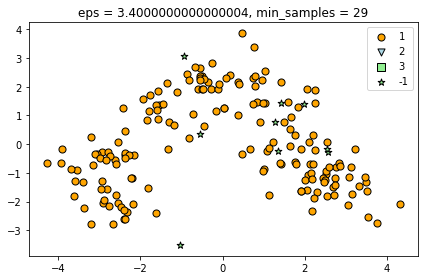

In [23]:
for i in range(1, 20):
    for j in range(1, 20):
        db = DBSCAN(eps=1.5+0.1*i, min_samples=10+j, metric='euclidean', n_jobs=-1).fit(X_std)
        y_db = db.labels_
        plt.title('eps = {0}, min_samples = {1}'.format(1.5+0.1*i, 10+j))
        plt.scatter(X_pca[y_db == 0, 0],
                    X_pca[y_db == 0, 1],
                    s=50, c='orange',
                    marker='o', edgecolor='black',
                    label='1')
        plt.scatter(X_pca[y_db == 1, 0],
                    X_pca[y_db == 1, 1],
                    s=50, c='lightblue',
                    marker='v', edgecolor='black',
                    label='2')
        plt.scatter(X_pca[y_db == 2, 0],
                    X_pca[y_db == 2, 1],
                    s=50, c='lightgreen',
                    marker='s', edgecolor='black',
                    label='3')
        plt.scatter(X_pca[y_db == -1, 0],
                    X_pca[y_db == -1, 1],
                    s=50, c='lightgreen',
                    marker='*', edgecolor='black',
                    label='-1')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [71]:
silhouette_avg = []
f1 = []
k = []
for i in range(1, 200):
    db = DBSCAN(eps=2.1+0.01*i, min_samples=13, metric='euclidean', n_jobs=-1).fit(X_std)
    y_db = db.labels_
    k.append(2.1+0.01*i)
    f1.append(f1_score(y-1, y_db, average='weighted'))
    silhouette_avg.append(np.mean(silhouette_samples(X_std, y_db, metric='euclidean')))

<function matplotlib.pyplot.show(close=None, block=None)>

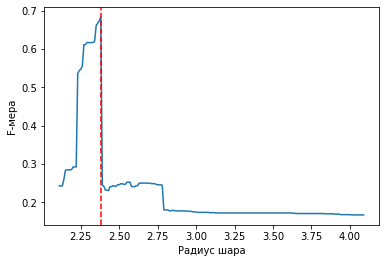

In [72]:
plt.plot(k, f1)
plt.axvline(2.38, color="red", linestyle="--") 
plt.ylabel('F-мера')
plt.xlabel("Радиус шара")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

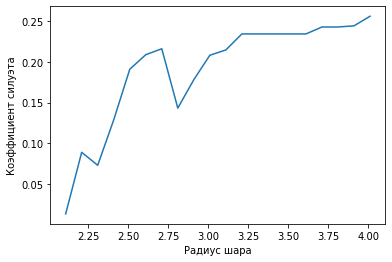

In [73]:
plt.plot(k[::10], silhouette_avg[::10])
plt.ylabel('Коэффициент силуэта')
plt.xlabel("Радиус шара")
plt.show